# 1. 데이터 전처리 및 피쳐 엔지니어링

## A. 아파트 위치 정보
- train.csv  -> apt_location.csv(아파트의 위치 - 위도, 경도)

### 1. train.csv 데이터 불러오기

In [1]:
import os
import pandas as pd

In [4]:
train_df = pd.read_csv("train.csv")
train_df

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.8200,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.1700,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.7400,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.3900,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.4300,2004,200801,21~31,3,120000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216548,1234823,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,59.8245,2012,201711,11~20,3,22000
1216549,1234824,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,7,30750
1216550,1234825,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,84.9923,2012,201711,21~30,9,29500
1216551,1234826,9586,부산광역시,정관읍 용수리,1364,정관신도시롯데캐슬,정관읍 용수리 1364 정관신도시롯데캐슬,101.7400,2008,201711,21~30,7,26700


### 2. city 컬럼이 '서울특별시'인 데이터만 남기기

In [5]:
train_df = train_df[train_df['city']=='서울특별시']
train_df['city'].unique()

array(['서울특별시'], dtype=object)

### 3. 위치를 나타낼 때 필요한 컬럼만 복사 - apt_loc_df

In [6]:
train_df.columns

Index(['transaction_id', 'apartment_id', 'city', 'dong', 'jibun', 'apt',
       'addr_kr', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor',
       'transaction_real_price'],
      dtype='object')

In [7]:
column_list = ['apartment_id', 'city', 'dong', 'jibun']
apt_loc_df = train_df[column_list].copy()
apt_loc_df.head()

,apartment_id,city,dong,jibun
0,7622,서울특별시,신교동,6-13
1,5399,서울특별시,필운동,142
2,3578,서울특별시,필운동,174-1
3,10957,서울특별시,내수동,95
4,10639,서울특별시,내수동,110-15


### 4. 'city' + 'dong' + 'jibun'으로 'address'(전체 주소) 컬럼 생성

In [8]:
apt_loc_df['address'] = apt_loc_df['city'] + ' ' + apt_loc_df['dong'] + ' ' + apt_loc_df['jibun'] 
apt_loc_df.head()

,apartment_id,city,dong,jibun,address
0,7622,서울특별시,신교동,6-13,서울특별시 신교동 6-13
1,5399,서울특별시,필운동,142,서울특별시 필운동 142
2,3578,서울특별시,필운동,174-1,서울특별시 필운동 174-1
3,10957,서울특별시,내수동,95,서울특별시 내수동 95
4,10639,서울특별시,내수동,110-15,서울특별시 내수동 110-15


In [9]:
apt_loc_df = apt_loc_df.drop(['city', 'dong', 'jibun'], axis=1)
apt_loc_df

,apartment_id,address
0,7622,서울특별시 신교동 6-13
1,5399,서울특별시 필운동 142
2,3578,서울특별시 필운동 174-1
3,10957,서울특별시 내수동 95
4,10639,서울특별시 내수동 110-15
...,...,...
1184014,996,서울특별시 강일동 717
1184015,682,서울특별시 강일동 674
1184016,682,서울특별시 강일동 674
1184017,680,서울특별시 강일동 665


### 5. unique한 주소값만 남기기

In [10]:
apt_loc_df['address'].nunique()

8174

In [9]:
addr_list = apt_loc_df['address'].unique()
addr_list

array(['서울특별시 신교동 6-13', '서울특별시 필운동 142', '서울특별시 필운동 174-1', ...,
       '서울특별시 천호동 121-32', '서울특별시 천호동 571', '서울특별시 천호동 320'], dtype=object)

In [10]:
apt_loc_df = apt_loc_df.drop_duplicates(subset=['address']).reset_index(drop=True)
apt_loc_df

,apartment_id,address
0,7622,서울특별시 신교동 6-13
1,5399,서울특별시 필운동 142
2,3578,서울특별시 필운동 174-1
3,10957,서울특별시 내수동 95
4,10639,서울특별시 내수동 110-15
...,...,...
8169,2498,서울특별시 마천동 50
8170,10457,서울특별시 둔촌동 64
8171,2159,서울특별시 천호동 121-32
8172,3784,서울특별시 천호동 571


### 6. address 'lat'(위도), 'long'(경도) 컬럼 생성 및 'apt_location.csv' 파일로 저장 - geopy 사용

In [ ]:
# 라이브러리 호출
from geopy.geocoders import Nominatim
from tqdm import tqdm

# geopy의 Nominatim을 사용하여 주소를 위도, 경도로 변환
geolocator = Nominatim(user_agent="my_geocoder", timeout=10)           
                         
# tqdm을 사용하여 반복 진행 상태 확인
tqdm.pandas()
address_changed = apt_loc_df['address']                     
apt_loc_df[['lat', 'long']] = address_changed.progress_apply(lambda x: pd.Series(geolocator.geocode(x)[1] if geolocator.geocode(x) else [None, None]))

# 지오코딩된 데이터프레임을 csv 파일로 저장
apt_loc_df = apt_loc_df.drop('address', axis=1)
apt_loc_df.to_csv('apt_location.csv', index=False)

이 부분은 시간이 오래 걸려 나눠서 진행했고, 저장된 csv 파일을 불러오도록 하겠습니다.

In [13]:
apt_location = pd.read_csv("apt_location.csv")
apt_location

,apartment_id,address,lat,long
0,7622,서울특별시 신교동 6-13,37.584160,126.967230
1,5399,서울특별시 필운동 142,37.577363,126.969097
2,3578,서울특별시 필운동 174-1,37.577363,126.969097
3,10957,서울특별시 내수동 95,37.572940,126.971800
4,10639,서울특별시 내수동 110-15,37.572940,126.971800
...,...,...,...,...
8169,1878,서울특별시 마천동 50,37.498030,127.151670
8170,1876,서울특별시 둔촌동 64,37.528958,127.144766
8171,5606,서울특별시 천호동 121-32,37.542940,127.127330
8172,1878,서울특별시 천호동 571,37.542940,127.127330


## B. 초등학교 위치 정보
- school.csv(서울시 학교 기본 정보) -> school_location.csv(학교 위치 - 위도, 경도)

### 1. school.csv 데이터 불러오기

In [15]:
import os
import pandas as pd
school_df = pd.read_csv("school.csv", encoding='cp949')

In [16]:
school_df

,학교종류명,설립구분,표준학교코드,학교명,영문학교명,관할조직명,도로명우편번호,도로명주소,도로명상세주소,전화번호,...,주야구분명,설립일자,개교기념일,시도교육청코드,시도교육청명,소재지명,주야과정,계열명,학과명,적재일시
0,각종학교(중),사립,7134155,선화예술중학교,Sunhwa Arts Middle School,서울특별시성동광진교육지원청,4991,서울특별시 광진구 천호대로 664,/ 선화예술중고등학교 (능동),02-2204-1100,...,주간,19731201,19730705,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230627
1,초등학교,공립,7134150,서울숭신초등학교,Seoul Soongshin Elementary School,서울특별시성동광진교육지원청,4702,서울특별시 성동구 마장로 161,(하왕십리동),02-2252-5950,...,주간,19590403,19590403,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
2,중학교,공립,7134142,행당중학교,Haengdang Middle School,서울특별시성동광진교육지원청,4764,서울특별시 성동구 왕십리로 189,(행당동/행당중학교),02-2292-2721,...,주간,19680806,19681002,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
3,중학교,사립,7134141,한양대학교사범대학부속중학교,Hanyang University Middle School,서울특별시성동광진교육지원청,4761,서울특별시 성동구 마조로 42,(사근동/한양사대부속중?고등학교),02-2200-3700,...,주간,19600118,19600118,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
4,중학교,공립,7134140,자양중학교,Jayang Middle School,서울특별시성동광진교육지원청,5069,서울특별시 광진구 뚝섬로41길 33,(자양동/서울자양중학교),02-446-0365,...,주간,19840301,19840301,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3930,고등학교,국립,1371661,국립국악고등학교,Gugak National High School,교육부,6311,서울특별시 강남구 개포로22길 65,(개포동/ 국악고등학교),02-3460-0500,...,주간,19550401,19720909,B10,서울특별시교육청,서울특별시,주간,예술계,무용과,20230615
3931,특수학교,국립,1342102,한국우진학교,Hanguk Woojin School,교육부,3934,서울특별시 마포구 월드컵북로38길 21,/ 한국우진학교 (중동),02-6388-5800,...,주간,20000301,20000306,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230709
3932,특수학교,국립,1342099,서울농학교,Seoul National school for the Deaf,교육부,3032,서울특별시 종로구 필운대로 103,(신교동),02-737-0659,...,주간,19130401,19130401,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230709
3933,특수학교,국립,1342098,서울맹학교,Seoul National School for the Blind,교육부,3032,서울특별시 종로구 필운대로 97,(신교동),02-731-6772,...,주간,19130401,19130401,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230709


### 2. 초등학교 데이터만 남겨두기

In [18]:
elem_school_df = school_df[school_df['학교종류명']=='초등학교'].copy().reset_index()
elem_school_df

,index,학교종류명,설립구분,표준학교코드,학교명,영문학교명,관할조직명,도로명우편번호,도로명주소,도로명상세주소,...,주야구분명,설립일자,개교기념일,시도교육청코드,시도교육청명,소재지명,주야과정,계열명,학과명,적재일시
0,1,초등학교,공립,7134150,서울숭신초등학교,Seoul Soongshin Elementary School,서울특별시성동광진교육지원청,4702,서울특별시 성동구 마장로 161,(하왕십리동),...,주간,19590403,19590403,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
1,25,초등학교,사립,7134118,한양초등학교,Hanyang Elementary School,서울특별시성동광진교육지원청,4763,서울특별시 성동구 살곶이길 208,/ 한양초등학교 (사근동),...,주간,19660220,19660515,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
2,26,초등학교,사립,7134117,세종초등학교,Sejong Elementary School,서울특별시성동광진교육지원청,5006,서울특별시 광진구 군자로 114,/ 세종초등학교 (군자동),...,주간,19621004,19621004,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
3,27,초등학교,사립,7134116,성동초등학교,Sungdong Elementary School,서울특별시성동광진교육지원청,5114,서울특별시 광진구 자양로4길 63,(자양동),...,주간,19661216,19670320,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
4,28,초등학교,공립,7134114,서울행현초등학교,Seoul Haenghyun Elementary School,서울특별시성동광진교육지원청,4713,서울특별시 성동구 행당로 95,(행당동),...,주간,20050714,20050901,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,1003,초등학교,공립,7021084,서울동답초등학교,Seoul Dongdap Elementary School,서울특별시동부교육지원청,2609,서울특별시 동대문구 답십리로60길 12,(답십리동/서울동답초등학교),...,주간,19831203,19840523,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
605,1004,초등학교,공립,7021083,서울답십리초등학교,Seoul Dapsimni Elementary School,서울특별시동부교육지원청,2601,서울특별시 동대문구 전농로3길 23,/ 서울답십리초등학교 (답십리동),...,주간,19620201,19621129,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
606,1005,초등학교,공립,7021082,서울군자초등학교,Seoul Gunja Elementary School,서울특별시동부교육지원청,2632,서울특별시 동대문구 한천로6길 21,/ 서울군자초등학교 (장안동),...,주간,19730106,19731122,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615
607,1006,초등학교,사립,7021080,금성초등학교,Kumsung Elementary school,서울특별시동부교육지원청,2028,서울특별시 중랑구 신내로21길 55,/ 금성초등학교 (신내동),...,주간,19650607,19650626,B10,서울특별시교육청,서울특별시,NaN,NaN,NaN,20230615


### 3. 위치를 나타낼 때 필요한 컬럼만 복사 - school_loc_df

In [31]:
elem_school_df.columns

Index(['index', '학교종류명', '설립구분', '표준학교코드', '학교명', '영문학교명', '관할조직명', '도로명우편번호',
       '도로명주소', '도로명상세주소', '전화번호', '홈페이지주소', '팩스번호', '남녀공학구분명', '고등학교구분명',
       '산업체특별학급존재여부', '고등학교일반실업구분명', '특수목적고등학교계열명', '입시전후기구분명', '주야구분명',
       '설립일자', '개교기념일', '시도교육청코드', '시도교육청명', '소재지명', '주야과정', '계열명', '학과명',
       '적재일시'],
      dtype='object')

In [32]:
elem_school_df = elem_school_df[['학교명', '도로명주소']]
elem_school_df.head()

,학교명,도로명주소
0,서울숭신초등학교,서울특별시 성동구 마장로 161
1,한양초등학교,서울특별시 성동구 살곶이길 208
2,세종초등학교,서울특별시 광진구 군자로 114
3,성동초등학교,서울특별시 광진구 자양로4길 63
4,서울행현초등학교,서울특별시 성동구 행당로 95


### 4. 도로명주소로 'lat'(위도), 'long'(경도) 컬럼 생성  - geopy 사용

In [ ]:
# 라이브러리 호출
from geopy.geocoders import Nominatim
from tqdm import tqdm

# geopy의 Nominatim을 사용하여 주소를 위도, 경도로 변환
geolocator = Nominatim(user_agent="my_geocoder", timeout=10)           
                         
# tqdm을 사용하여 반복 진행 상태 확인
tqdm.pandas()
address_changed = elem_school_df['도로명주소']                     
elem_school_df[['lat', 'long']] = address_changed.progress_apply(lambda x: pd.Series(geolocator.geocode(x)[1] if geolocator.geocode(x) else [None, None]))

# 지오코딩된 데이터프레임을 csv 파일로 저장
elem_school_df = elem_school_df.drop('도로명주소', axis=1)
elem_school_df.to_csv('elem_school_location.csv', index=False)

이 부분은 시간이 오래 걸려 나눠서 진행했고, 저장된 csv 파일을 불러오도록 하겠습니다.

In [24]:
elem_location = pd.read_csv("elem_school_df.csv")
elem_location[['학교명', '도로명주소', '위도', '경도']]

,학교명,도로명주소,위도,경도
0,서울숭신초등학교,서울특별시 성동구 마장로 161,37.566823,127.033371
1,한양초등학교,서울특별시 성동구 살곶이길 208,37.570770,127.042340
2,세종초등학교,서울특별시 광진구 군자로 114,37.544164,127.071789
3,성동초등학교,서울특별시 광진구 자양로4길 63,37.532374,127.088377
4,서울행현초등학교,서울특별시 성동구 행당로 95,37.555630,127.025280
...,...,...,...,...
604,서울동답초등학교,서울특별시 동대문구 답십리로60길 12,37.567914,127.062040
605,서울답십리초등학교,서울특별시 동대문구 전농로3길 23,37.570205,127.055933
606,서울군자초등학교,서울특별시 동대문구 한천로6길 21,37.564027,127.062655
607,금성초등학교,서울특별시 중랑구 신내로21길 55,37.614974,127.088719


In [34]:
elem_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   학교명     609 non-null    object 
 1   lat     601 non-null    float64
 2   long    601 non-null    float64
dtypes: float64(2), object(1)
memory usage: 14.4+ KB


## C. 어린이집 위치 정보
- kindergarten.csv(서울시 어린이집 정보) -> kindergarten_location.csv(어린이집 위치 - 위도, 경도)

### 1. kindergarten.csv 데이터 불러오기

In [25]:
import os
import pandas as pd
kindergarten_df = pd.read_csv("kindergarten.csv", encoding='cp949')

In [26]:
kindergarten_df

,시군구명,어린이집코드,어린이집명,어린이집유형,운영현황,우편번호,상세주소,전화번호,팩스번호,홈페이지주소,...,교직원현황-보육교사,교직원현황-특수교사,교직원현황-치료교사,교직원현황-영양사,교직원현황-간호사,교직원현황-간호조무사,교직원현황-조리원,교직원현황-사무직원,교직원현황-총계,데이터수집일
0,서대문구,11410000379,사랑별어린이집,국공립,정상,3712.0,서울특별시 서대문구 수색로2길 19-7 DMC금호리첸시아아파트 단지 내,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:03:35.0
1,중구,11140000123,현대캐피탈 도담어린이집,직장,정상,4527.0,서울특별시 중구 세종대로 14 그랜드센트럴 2층 현대캐피탈 도담어린이집,02-6411-6191,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022-10-26 06:18:44.0
2,광진구,11215000364,광진구육아종합지원센터(꾸미팡팡공동육아방 3호점),국공립,정상,4999.0,서울특별시 광진구 동일로56가길 31 3층,02-466-1827,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:02:15.0
3,영등포구,11560000498,삼환어린이집,국공립,정상,7227.0,서울특별시 영등포구 영중로 145 영등포삼환아파트 104동 101호,02-2679-5967,NaN,NaN,...,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,2022-10-26 22:04:35.0
4,구로구,11530000648,별숲어린이집,국공립,정상,8226.0,서울특별시 구로구 경인로43길 49 고척아이파크MD 내 관리실,02-860-0000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:04:16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9361,노원구,11350000997,가람방과후어린이집,사회복지법인,폐지,1851.0,서울특별시 노원구 섬밭로 156,02-975-2464,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:03:16.0
9362,강남구,11680000372,언북몬테소리어린이집,민간,폐지,135100.0,서울 강남구 청담동,02-546-3369,070-8118-3362,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 09:13:35.0
9363,은평구,11380000532,한소리어린이집,민간,폐지,122908.0,서울 은평구 응암1동 98-15,02-388-7683,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:03:26.0
9364,은평구,11380000510,꿈동이그림놀이방,가정,폐지,122010.0,서울 은평구 응암동 288-12,02-309-7374,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:03:26.0


### 2. 운영현황이 정상, 재개인 데이터만 남겨두기

In [28]:
kindergarten_df = kindergarten_df[(kindergarten_df['운영현황'] == '정상') | (kindergarten_df['운영현황'] == '재개')]
kindergarten_df

,시군구명,어린이집코드,어린이집명,어린이집유형,운영현황,우편번호,상세주소,전화번호,팩스번호,홈페이지주소,...,교직원현황-보육교사,교직원현황-특수교사,교직원현황-치료교사,교직원현황-영양사,교직원현황-간호사,교직원현황-간호조무사,교직원현황-조리원,교직원현황-사무직원,교직원현황-총계,데이터수집일
0,서대문구,11410000379,사랑별어린이집,국공립,정상,3712.0,서울특별시 서대문구 수색로2길 19-7 DMC금호리첸시아아파트 단지 내,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:03:35.0
1,중구,11140000123,현대캐피탈 도담어린이집,직장,정상,4527.0,서울특별시 중구 세종대로 14 그랜드센트럴 2층 현대캐피탈 도담어린이집,02-6411-6191,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2022-10-26 06:18:44.0
2,광진구,11215000364,광진구육아종합지원센터(꾸미팡팡공동육아방 3호점),국공립,정상,4999.0,서울특별시 광진구 동일로56가길 31 3층,02-466-1827,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:02:15.0
3,영등포구,11560000498,삼환어린이집,국공립,정상,7227.0,서울특별시 영등포구 영중로 145 영등포삼환아파트 104동 101호,02-2679-5967,NaN,NaN,...,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,2022-10-26 22:04:35.0
4,구로구,11530000648,별숲어린이집,국공립,정상,8226.0,서울특별시 구로구 경인로43길 49 고척아이파크MD 내 관리실,02-860-0000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26 22:04:16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9350,동대문구,11230000503,꿈자람공동육아방 배봉산점,국공립,정상,2508.0,서울특별시 동대문구 전농로16길 97 숲속도서관 1층,02-2212-1975,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-15 09:29:55.0
9353,동대문구,11230000500,꿈자람공동육아방 장안1호점,국공립,정상,2624.0,서울특별시 동대문구 답십리로66길 3,02-2212-0833,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-15 09:29:55.0
9355,동대문구,11230000502,꿈자람공동육아방 용신점,국공립,정상,2587.0,서울특별시 동대문구 무학로 89 2층,02-921-5801,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-15 09:29:55.0
9357,동대문구,11230000501,꿈자람공동육아방 장안2호점,국공립,정상,2529.0,서울특별시 동대문구 한천로28길 9 202동1호,02-2212-5844,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-06-15 09:29:55.0


### 3. 위치를 나타낼 때 필요한 컬럼만 복사 - kindergarten_loc_df

In [29]:
kindergarten_df.columns

Index(['시군구명', '어린이집코드', '어린이집명', '어린이집유형', '운영현황', '우편번호', '상세주소', '전화번호',
       '팩스번호', '홈페이지주소', '보육실수', '보육실 면적', '놀이터수', 'CCTV총설치수', '보육교직원수', '정원',
       '현원', '시설 위도(좌표값)', '시설 경도(좌표값)', '통학차량운영여부', '인가일자', '휴지시작일자',
       '휴지종료일자', '폐지일자', '데이터기준일자', '제공서비스', '반수-만0세', '반수-만1세', '반수-만2세',
       '반수-만3세', '반수-만4세', '반수-만5세', '반수-영아혼합(만0~2세)', '반수-유아혼합(만3~5세)',
       '반수-특수장애', '반수-총계', '아동수-만0세', '아동수-만1세', '아동수-만2세', '아동수-만3세',
       '아동수-만4세', '아동수-만5세', '아동수-영아혼합(만0~2세)', '아동수-유아혼합(만3~5세)', '아동수-특수장애',
       '아동수-총계', '근속년수-1년미만', '근속년수-1년이상~2년미만', '근속년수-2년이상~4년미만',
       '근속년수-4년이상~6년미만', '근속년수-6년이상', '교직원현황-원장', '교직원현황-보육교사', '교직원현황-특수교사',
       '교직원현황-치료교사', '교직원현황-영양사', '교직원현황-간호사', '교직원현황-간호조무사', '교직원현황-조리원',
       '교직원현황-사무직원', '교직원현황-총계', '데이터수집일'],
      dtype='object')

In [31]:
kindergarten_loc_df = kindergarten_df[['어린이집명', '상세주소', '시설 위도(좌표값)', '시설 경도(좌표값)']]
kindergarten_loc_df

,어린이집명,상세주소,시설 위도(좌표값),시설 경도(좌표값)
0,사랑별어린이집,서울특별시 서대문구 수색로2길 19-7 DMC금호리첸시아아파트 단지 내,37.566470,126.977963
1,현대캐피탈 도담어린이집,서울특별시 중구 세종대로 14 그랜드센트럴 2층 현대캐피탈 도담어린이집,37.557714,126.974558
2,광진구육아종합지원센터(꾸미팡팡공동육아방 3호점),서울특별시 광진구 동일로56가길 31 3층,NaN,NaN
3,삼환어린이집,서울특별시 영등포구 영중로 145 영등포삼환아파트 104동 101호,37.529653,126.904724
4,별숲어린이집,서울특별시 구로구 경인로43길 49 고척아이파크MD 내 관리실,37.566470,126.977963
...,...,...,...,...
9350,꿈자람공동육아방 배봉산점,서울특별시 동대문구 전농로16길 97 숲속도서관 1층,NaN,NaN
9353,꿈자람공동육아방 장안1호점,서울특별시 동대문구 답십리로66길 3,NaN,NaN
9355,꿈자람공동육아방 용신점,서울특별시 동대문구 무학로 89 2층,NaN,NaN
9357,꿈자람공동육아방 장안2호점,서울특별시 동대문구 한천로28길 9 202동1호,NaN,NaN


### 4. 결측치 처리

1) __상세주소__ 결측치

In [40]:
kindergarten_loc_df[kindergarten_loc_df['상세주소'].isna()]

,어린이집명,상세주소,시설 위도(좌표값),시설 경도(좌표값)
4909,성수영유아플라자,NaN,NaN,NaN
4910,성동구육아종합지원센터,NaN,NaN,NaN
4911,금호키즈카페 금호장난감세상,NaN,NaN,NaN
4912,옥수장난감세상,NaN,NaN,NaN
4913,왕십리장난감세상,NaN,NaN,NaN
4914,뮤직키즈스튜디오,NaN,NaN,NaN
4915,무지개장난감세상노올터,NaN,NaN,NaN


- 영유아플라자, 장난감세상, 키드스튜디오는 유치원이 아니므로 제거

In [41]:
# 삭제할 특정 인덱스의 레코드를 삭제
indexes_to_drop = [4909, 4911, 4912, 4913, 4914, 4915]
kindergarten_loc_df = kindergarten_loc_df.drop(indexes_to_drop)
kindergarten_loc_df[kindergarten_loc_df['상세주소'].isna()]

,어린이집명,상세주소,시설 위도(좌표값),시설 경도(좌표값)
4910,성동구육아종합지원센터,NaN,NaN,NaN


- 성동구육아종합지원센터의 상세주소 채워넣기

In [42]:
kindergarten_loc_df.loc[kindergarten_loc_df['어린이집명'] == '성동구육아종합지원센터', '상세주소'] = '서울시 성동구 고산자로16길 10-53'
kindergarten_loc_df.loc[kindergarten_loc_df['어린이집명'] == '성동구육아종합지원센터', '상세주소']

4910    서울시 성동구 고산자로16길 10-53
Name: 상세주소, dtype: object

- 성동구육아종합지원센터 지오코딩

In [43]:
from tqdm import tqdm

# geopy의 Nominatim을 사용하여 주소를 위도, 경도로 변환
geolocator = Nominatim(user_agent="my_geocoder")           
                         
# tqdm을 사용하여 반복 진행 상태 확인
tqdm.pandas()
address_changed= kindergarten_loc_df.loc[kindergarten_loc_df['어린이집명'] == '성동구육아종합지원센터', '상세주소']              
result = address_changed.progress_apply(lambda x: pd.Series(geolocator.geocode(x)[1] 
                                                                              if geolocator.geocode(x) else [None, None]))
result

100%|██████████| 1/1 [00:01<00:00,  1.10s/it]


,0,1
4910,37.565344,127.037539


In [44]:
kindergarten_loc_df.loc[kindergarten_loc_df['어린이집명'] == '성동구육아종합지원센터','시설 위도(좌표값)'] = 37.565344
kindergarten_loc_df.loc[kindergarten_loc_df['어린이집명'] == '성동구육아종합지원센터','시설 경도(좌표값)'] = 127.037539
kindergarten_loc_df.loc[kindergarten_loc_df['어린이집명'] == '성동구육아종합지원센터']

,어린이집명,상세주소,시설 위도(좌표값),시설 경도(좌표값)
4910,성동구육아종합지원센터,서울시 성동구 고산자로16길 10-53,37.565344,127.037539


2) __위도, 경도__ 결측치

In [45]:
kindergarten_loc_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4829 entries, 0 to 9365
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   어린이집명       4829 non-null   object 
 1   상세주소        4829 non-null   object 
 2   시설 위도(좌표값)  4724 non-null   float64
 3   시설 경도(좌표값)  4724 non-null   float64
dtypes: float64(2), object(2)
memory usage: 188.6+ KB


- 위도, 경도 결측치인 데이터 삭제(drop)

In [46]:
kindergarten_loc_df.dropna(inplace=True)
kindergarten_loc_df

,어린이집명,상세주소,시설 위도(좌표값),시설 경도(좌표값)
0,사랑별어린이집,서울특별시 서대문구 수색로2길 19-7 DMC금호리첸시아아파트 단지 내,37.566470,126.977963
1,현대캐피탈 도담어린이집,서울특별시 중구 세종대로 14 그랜드센트럴 2층 현대캐피탈 도담어린이집,37.557714,126.974558
3,삼환어린이집,서울특별시 영등포구 영중로 145 영등포삼환아파트 104동 101호,37.529653,126.904724
4,별숲어린이집,서울특별시 구로구 경인로43길 49 고척아이파크MD 내 관리실,37.566470,126.977963
5,달숲어린이집,서울특별시 구로구 중앙로5길 59 고척아이파크 RD 내 관리동,37.500515,126.860220
...,...,...,...,...
9335,마포어린이집,서울특별시 마포구 양화로18안길 21 (동교동),37.557013,126.925671
9336,명인어린이집,서울특별시 중랑구 면목로53길 70 (면목동),37.584086,127.084445
9337,역삼가애어린이집,서울특별시 강남구 도곡로37길 15 (역삼동),37.494831,127.044734
9338,해든어린이집,"서울특별시 광진구 능동로3마길 1 (자양동, 자양)",37.534337,127.064220


### 6. 필요 없는 컬럼 처리 및 'kindergarten_location.csv' 파일로 저장

In [47]:
kindergarten_loc_df = kindergarten_loc_df[['어린이집명', '시설 위도(좌표값)', '시설 경도(좌표값)']]
kindergarten_loc_df = kindergarten_loc_df.rename(columns={'시설 위도(좌표값)':'lat', '시설 경도(좌표값)':'long'})
kindergarten_loc_df.head()

,어린이집명,lat,long
0,사랑별어린이집,37.566470,126.977963
1,현대캐피탈 도담어린이집,37.557714,126.974558
3,삼환어린이집,37.529653,126.904724
4,별숲어린이집,37.566470,126.977963
5,달숲어린이집,37.500515,126.860220


In [48]:
kindergarten_loc_df.to_csv('kindergarten_location.csv', index=False)

## D. 서울 공원 위치 정보
- seoul_park.csv(서울시 주요 공원 데이터) -> park_location.csv(공원 위치 - 위도, 경도)

### 1. seoul_park.csv 데이터 불러오기

In [49]:
import os
import pandas as pd
park_df = pd.read_csv(og_path + "seoul_park.csv", encoding='cp949')

In [50]:
park_df.head()

,연번,공원명,공원개요,면적,개원일,주요시설,주요식물,안내도,오시는길,이용시참고사항,이미지,지역,공원주소,관리부서,전화번호,X좌표(GRS80TM),Y좌표(GRS80TM),X좌표(WGS84),Y좌표(WGS84),바로가기
0,1,남산도시자연공원,남산공원은 도심에 위치하여 서울시민에게 맑은 공기를 제공하는 자연휴식처이며 산책 꽃...,2896887㎡ 임 야 : 2454140㎡ 녹지대 및 기타시설 : 442747㎡,1968.9.10,기반시설 : 광장 45950㎡ 도로 108530㎡ 산책로 6.7㎞ (북측:3.7㎞/...,소나무 단풍 아카시아 상수리나무 등 191종 2881870주,http://parks.seoul.go.kr/upload/seditorMulti/2...,명동역(남산케이블카 와룡묘 서울애니메이션센터 방면) 도보 명동역 3번출구 → 퍼시픽...,남산공원 차량통행 금지안내 2005년 5월 1일부터 남산공원에 일반승용차 택시 통행...,http://parks.seoul.go.kr/file/info/view.do?fId...,중구,서울특별시 중구 삼일대로 231(예장동),서울특별시중부푸른도시사업소,02-3783-5900,198364.107,450395.554,126.990377,37.550140,http://parks.seoul.go.kr/template/sub/namsan.do
1,2,길동생태공원,길동생태공원은 생물의 서식처를 제공하고 종다양성을 증진시키며 자연생태계의 생물들을 ...,80683㎡,1999.5.20,탐방객안내소 야외전시대 관찰대 목재데크 조류관찰대 길동생태문화센터,소나무 보리수 등 64종 31800주 산국 부들 등 138종 192800본,http://parks.seoul.go.kr/template/common/img/p...,NaN,매주 월요일은 휴관입니다 사전예약 후 입장하실 수 있습니다. ▶ 인터넷 예약 바로가...,http://parks.seoul.go.kr/file/info/view.do?fId...,강동구,서울특별시 강동구 천호대로 1291(길동생태공원),동부공원녹지사업소 길동생태공원,02-489-2770,213554.120,448852.675,127.154779,37.540394,http://parks.seoul.go.kr/template/sub/gildong.do
2,3,서울대공원,서울대공원은 세계 각국의 야생동물들이 살아 숨 쉬는 서울동물원과 다양한 재미와 즐거...,9132690m²,1984.5.1,동물원 식물원 테마가든(장미원 어린이동물원 피크닉장) 치유숲 산림욕장 캠핑장 국립현...,NaN,NaN,지하철 4호선 대공원역 하차(2번 출구) 도보 15분 정도 문의처 02)500-73...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,과천시,경기도 과천시 대공원광장로 102,전략기획실,02-500-7032,200994.267,437163.981,127.019846,37.426449,http://grandpark.seoul.go.kr/
3,4,서울숲,당초 골프장 승마장 등이 있던 뚝섬일대를 주거업무 지역으로 개발할 경우 약 4조원에...,480994㎡,2005.6.18,4개 테마공원: 문화예술공원 자연생태숲 자연체험학습원 습지생태원 주요시설: 가족마당...,수 목 : 소나무 섬잣나무 계수나무 외 95종 415795주 식물원 : 선인장 등 ...,http://parks.seoul.go.kr/template/common/img/p...,NaN,지하철 분당선 서울숲역 3번출구 도보로 약5분 2호선 뚝섬역 8번출구 도보로 약 1...,http://parks.seoul.go.kr/file/info/view.do?fId...,성동구,서울특별시 성동구 뚝섬로 273 (성수동1가),서울숲 관리사무소,02-460-2905,203695.432,449290.726,127.041798,37.543072,http://parks.seoul.go.kr/template/sub/seoulfor...
4,5,월드컵공원,월드컵공원은 서울의 서쪽에 위치하여 1978년부터 1993년까지 15년간 서울시민이...,2284085㎡,2002.5.1,평화의 공원 월드컵공원전시관(879㎡) 유니세프광장(2400㎡) 평화광장(5217㎡...,NaN,http://parks.seoul.go.kr/template/common/img/p...,지하철 6호선 월드컵경기장역 하차 → 1번 출구로 나온 후 직진 → 큰길(도로)이 ...,일반사항 공원을 깨끗하게 이용합니다. 대중교통을 이용해 주세요. 기념물 시설물 풀과...,http://parks.seoul.go.kr/file/info/view.do?fId...,마포구,서울특별시 마포구 하늘공원로 84(월드컵공원),월드컵공원,02-300-5500,190658.070,451598.831,126.878907,37.571805,http://parks.seoul.go.kr/template/sub/worldcup...


### 3. 위치를 나타낼 때 필요한 컬럼만 복사 - park_loc_df

In [51]:
park_df.columns

Index(['연번', '공원명', '공원개요', '면적', '개원일', '주요시설', '주요식물', '안내도', '오시는길',
       '이용시참고사항', '이미지', '지역', '공원주소', '관리부서', '전화번호', 'X좌표(GRS80TM)',
       'Y좌표(GRS80TM)', 'X좌표(WGS84)', 'Y좌표(WGS84)', '바로가기'],
      dtype='object')

In [52]:
park_loc_df = park_df[['공원명', '공원주소', 'X좌표(WGS84)', 'Y좌표(WGS84)']].copy()
park_loc_df.head()

,공원명,공원주소,X좌표(WGS84),Y좌표(WGS84)
0,남산도시자연공원,서울특별시 중구 삼일대로 231(예장동),126.990377,37.550140
1,길동생태공원,서울특별시 강동구 천호대로 1291(길동생태공원),127.154779,37.540394
2,서울대공원,경기도 과천시 대공원광장로 102,127.019846,37.426449
3,서울숲,서울특별시 성동구 뚝섬로 273 (성수동1가),127.041798,37.543072
4,월드컵공원,서울특별시 마포구 하늘공원로 84(월드컵공원),126.878907,37.571805


### 4. 결측치 처리

In [53]:
park_loc_df[park_loc_df.isna().any(axis=1)]

,공원명,공원주소,X좌표(WGS84),Y좌표(WGS84)
131,서울로7017,서울로7017,NaN,NaN


- 서울로7017 공원의 공원주소를 '서울시 중구 봉래동2가 122-14'로 변경

In [54]:
park_loc_df.loc[park_loc_df['공원명'] == '서울로7017', '공원주소'] = '서울시 중구 봉래동2가 122-14'
park_loc_df.loc[park_loc_df['공원명'] == '서울로7017', '공원주소']

131    서울시 중구 봉래동2가 122-14
Name: 공원주소, dtype: object

In [55]:
# tqdm을 사용하여 반복 진행 상태 확인
tqdm.pandas()
address_changed= park_loc_df.loc[park_loc_df['공원명'] == '서울로7017', '공원주소']             
result = address_changed.progress_apply(lambda x: pd.Series(geolocator.geocode(x)[1] 
                                                                              if geolocator.geocode(x) else [None, None]))
result

100%|██████████| 1/1 [00:00<00:00,  1.12it/s]


,0,1
131,37.55661,126.97177


In [56]:
park_loc_df.loc[park_loc_df['공원명'] == '서울로7017','Y좌표(WGS84)'] = 37.55661
park_loc_df.loc[park_loc_df['공원명'] == '서울로7017','X좌표(WGS84)'] = 126.97177
park_loc_df.loc[park_loc_df['공원명'] == '서울로7017']

,공원명,공원주소,X좌표(WGS84),Y좌표(WGS84)
131,서울로7017,서울시 중구 봉래동2가 122-14,126.97177,37.55661


### 6. 필요 없는 컬럼 처리 및 'park_location.csv' 파일로 저장

In [57]:
park_loc_df = park_loc_df[['공원명', 'Y좌표(WGS84)', 'X좌표(WGS84)']]
park_loc_df = park_loc_df.rename(columns={'Y좌표(WGS84)':'lat', 'X좌표(WGS84)':'long'})
park_loc_df.head()

,공원명,lat,long
0,남산도시자연공원,37.550140,126.990377
1,길동생태공원,37.540394,127.154779
2,서울대공원,37.426449,127.019846
3,서울숲,37.543072,127.041798
4,월드컵공원,37.571805,126.878907


In [58]:
park_loc_df.to_csv('park_location.csv', index=False)

## E. 위도, 경도 데이터에 따른 거리 계산 : Haversine Method

In [ ]:
# !pip install haversine -qq

In [ ]:
from haversine import haversine

In [ ]:
# 아파트와 거리를 계산할 공원, 보육시설, 지하철, 초등학교 위도, 경도 데이터 준비
park = pd.read_csv(os.path.join(data_dir, "seoul_park_modified.csv"))
kin = pd.read_csv(os.path.join(data_dir, "kindergarten_modified.csv"))
subway = pd.read_csv(os.path.join(data_dir, "서울시 역사마스터 정보.csv"), encoding="cp949")
elementary = pd.read_csv(os.path.join(data_dir, "elem_school_df.csv"))

In [ ]:
# 공원 데이터의 위도, 경도 컬럼 명 통일화
park.rename(columns={"Y좌표(WGS84)":"위도", "X좌표(WGS84)":"경도"}, inplace=True)

# 보육시설 데이터에 상세 주소가 null인 것이 존재
kin = kin[((kin["운영현황"] == "정상")|(kin["운영현황"] == "재개"))]
kin.rename(columns={"시설 위도(좌표값)":"위도", "시설 경도(좌표값)":"경도"}, inplace=True)
kin.dropna(subset=["위도", "경도"])

In [ ]:
from haversine import haversine

def cal_min_dist(original, df):
    min_dist = []

    for _, a in original.iterrows():
        tmp = []
        from_original = (a["Latitude"], a["Longitude"])

        for _, p in df.iterrows():
            to_where = (p["위도"], p["경도"])

            tmp.append(haversine(from_original, to_where))
        min_dist.append(min(tmp))
    return min_dist

In [ ]:
apt_location["park_min"] = cal_min_dist(apt_location, park)
apt_location["kind_min"] = cal_min_dist(apt_location, kin)
apt_location["subway_min"] = cal_min_dist(apt_location, subway)
apt_location["elem_min"] = cal_min_dist(apt_location, elementary)


# apt_location.to_csv('apt_loc_min_dists_2.csv', index=False)

# F. 아파트 위치 및 최단거리 데이터와 train 데이터 합치기

In [40]:
import pandas as pd

train_seoul = pd.read_csv('train_seoul.csv')
features = pd.read_csv('apt_loc_min_dists_2.csv')

In [41]:
features

,Unnamed: 0,apartment_id,address,lat,long,park_min,kind_min,subway_min,elem_min
0,0,7622,서울특별시 신교동 6-13,37.584160,126.967230,0.831168,0.295177,1.086383,0.266380
1,1,5399,서울특별시 필운동 142,37.577363,126.969097,0.213923,0.089404,0.429346,0.211640
2,2,3578,서울특별시 필운동 174-1,37.577363,126.969097,0.213923,0.089404,0.429346,0.211640
3,3,10957,서울특별시 내수동 95,37.572940,126.971800,0.365575,0.102862,0.348871,0.566101
4,4,10639,서울특별시 내수동 110-15,37.572940,126.971800,0.365575,0.102862,0.348871,0.566101
...,...,...,...,...,...,...,...,...,...
8169,8169,9775,서울특별시 홍은동 산11-244,37.596424,126.936852,1.187825,0.332356,0.509961,0.686142
8170,8170,3626,서울특별시 홍제동 156-200,37.585711,126.944818,0.829948,0.058017,0.385010,0.681322
8171,8171,12536,서울특별시 화곡동 56-252,37.541694,126.850617,0.117169,0.036755,0.895623,0.086911
8172,8172,12058,서울특별시 회기동 60-223,37.591240,127.048121,1.225728,0.302560,0.856847,0.167785


In [42]:
train_features = pd.merge(train_seoul, features, on='address', how='left')
train_features

,transaction_id,apartment_id_x,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,...,transaction_real_price,address,Unnamed: 0,apartment_id_y,lat,long,park_min,kind_min,subway_min,elem_min
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,...,37500,서울특별시 신교동 6-13,0,7622,37.584160,126.967230,0.831168,0.295177,1.086383,0.266380
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,...,20000,서울특별시 필운동 142,1,5399,37.577363,126.969097,0.213923,0.089404,0.429346,0.211640
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,...,38500,서울특별시 필운동 174-1,2,3578,37.577363,126.969097,0.213923,0.089404,0.429346,0.211640
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,...,118000,서울특별시 내수동 95,3,10957,37.572940,126.971800,0.365575,0.102862,0.348871,0.566101
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,...,120000,서울특별시 내수동 110-15,4,10639,37.572940,126.971800,0.365575,0.102862,0.348871,0.566101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
742280,1196844,996,서울특별시,강일동,717,고덕리엔파크2단지,강일동 717 고덕리엔파크2단지,59.72,2011,201711,...,53000,서울특별시 강일동 717,7938,1878,37.567230,127.171300,0.882426,0.068553,1.157378,0.579140
742281,1196846,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,59.87,2009,201711,...,53000,서울특별시 강일동 674,7877,429,37.567230,127.171300,0.882426,0.068553,1.157378,0.579140
742282,1196847,682,서울특별시,강일동,674,강일리버파크3단지,강일동 674 강일리버파크3단지,84.74,2009,201711,...,56500,서울특별시 강일동 674,7877,429,37.567230,127.171300,0.882426,0.068553,1.157378,0.579140
742283,1196848,680,서울특별시,강일동,665,강일리버파크1단지,강일동 665 강일리버파크1단지,84.74,2009,201711,...,55500,서울특별시 강일동 665,7873,5293,37.567230,127.171300,0.882426,0.068553,1.157378,0.579140


In [43]:
train_features.describe()

,transaction_id,apartment_id_x,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,Unnamed: 0,apartment_id_y,lat,long,park_min,kind_min,subway_min,elem_min
count,7.422850e+05,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000
mean,4.262599e+05,6443.204074,77.906753,1998.056237,201327.614206,8.808746,49169.779317,3733.239807,6215.808009,37.555029,127.001507,1.020257,0.168869,0.589706,0.388115
std,3.216569e+05,3542.337499,28.691683,8.995775,289.810480,5.920718,33868.323394,2345.499165,3866.147344,0.056749,0.088986,0.596747,0.119353,0.321318,0.222857
min,0.000000e+00,0.000000,11.955900,1961.000000,200801.000000,-4.000000,350.000000,0.000000,1.000000,37.445050,126.793126,0.034662,0.009886,0.002982,0.010148
25%,1.855710e+05,3668.000000,59.740000,1992.000000,201102.000000,4.000000,29000.000000,1687.000000,2116.000000,37.505560,126.929161,0.568007,0.090204,0.367921,0.227960
50%,3.711420e+05,6149.000000,83.160000,1999.000000,201405.000000,8.000000,40000.000000,3318.000000,5647.000000,37.543636,127.020195,0.937452,0.150836,0.533489,0.351831
75%,5.567130e+05,9610.000000,84.960000,2004.000000,201603.000000,12.000000,58000.000000,5749.000000,9779.000000,37.597420,127.072420,1.399623,0.217295,0.716140,0.527155
max,1.196849e+06,12658.000000,424.320000,2017.000000,201711.000000,69.000000,820000.000000,8173.000000,12615.000000,37.682606,127.171300,3.103618,1.015216,3.196721,1.688865


### 가장 오래된 아파트를 기준으로 adjusted_year_of_completion 컬럼 생성

In [5]:
train_features['adjusted_year_of_completion'] = train_features['year_of_completion'] - train_features['year_of_completion'].min()

### floor 변수에 음수값 전처리

In [10]:
train_features['floor'] = np.abs(train_features['floor'])

In [ ]:
# train_features.to_csv('train_processed.csv', index=False)

# 2. 탐색적 데이터 분석

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [63]:
train_processed = pd.read_csv('train_processed.csv')
test_processed = pd.read_csv('test_processed.csv')

In [64]:
test_processed[['park_min', 'kind_min', 'subway_min', 'elem_min']] = test_processed[['park_min', 'kind_min', 'subway_min', 'elem_min']] * 100
train_processed.describe()

,transaction_id,apartment_id_x,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,lat,long,park_min,kind_min,subway_min,elem_min,adjusted_year_of_completion
count,7.422850e+05,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000
mean,4.262599e+05,6443.204074,77.906753,1998.056237,201327.614206,8.809247,49169.779317,37.555029,127.001507,1.020257,0.168869,0.589706,0.388115,37.056237
std,3.216569e+05,3542.337499,28.691683,8.995775,289.810480,5.919972,33868.323394,0.056749,0.088986,0.596747,0.119353,0.321318,0.222857,8.995775
min,0.000000e+00,0.000000,11.955900,1961.000000,200801.000000,1.000000,350.000000,37.445050,126.793126,0.034662,0.009886,0.002982,0.010148,0.000000
25%,1.855710e+05,3668.000000,59.740000,1992.000000,201102.000000,4.000000,29000.000000,37.505560,126.929161,0.568007,0.090204,0.367921,0.227960,31.000000
50%,3.711420e+05,6149.000000,83.160000,1999.000000,201405.000000,8.000000,40000.000000,37.543636,127.020195,0.937452,0.150836,0.533489,0.351831,38.000000
75%,5.567130e+05,9610.000000,84.960000,2004.000000,201603.000000,12.000000,58000.000000,37.597420,127.072420,1.399623,0.217295,0.716140,0.527155,43.000000
max,1.196849e+06,12658.000000,424.320000,2017.000000,201711.000000,69.000000,820000.000000,37.682606,127.171300,3.103618,1.015216,3.196721,1.688865,56.000000


### 최단 거리 * 100 -> 10m 단위로 가정함

In [65]:
train_processed[['park_min', 'kind_min', 'subway_min', 'elem_min']] = train_processed[['park_min', 'kind_min', 'subway_min', 'elem_min']] * 100
test_processed[['park_min', 'kind_min', 'subway_min', 'elem_min']] = test_processed[['park_min', 'kind_min', 'subway_min', 'elem_min']] * 100
train_processed.describe()

,transaction_id,apartment_id_x,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,lat,long,park_min,kind_min,subway_min,elem_min,adjusted_year_of_completion
count,7.422850e+05,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000,742285.000000
mean,4.262599e+05,6443.204074,77.906753,1998.056237,201327.614206,8.809247,49169.779317,37.555029,127.001507,102.025658,16.886922,58.970576,38.811473,37.056237
std,3.216569e+05,3542.337499,28.691683,8.995775,289.810480,5.919972,33868.323394,0.056749,0.088986,59.674653,11.935284,32.131797,22.285736,8.995775
min,0.000000e+00,0.000000,11.955900,1961.000000,200801.000000,1.000000,350.000000,37.445050,126.793126,3.466185,0.988599,0.298153,1.014755,0.000000
25%,1.855710e+05,3668.000000,59.740000,1992.000000,201102.000000,4.000000,29000.000000,37.505560,126.929161,56.800661,9.020449,36.792115,22.796014,31.000000
50%,3.711420e+05,6149.000000,83.160000,1999.000000,201405.000000,8.000000,40000.000000,37.543636,127.020195,93.745189,15.083572,53.348907,35.183073,38.000000
75%,5.567130e+05,9610.000000,84.960000,2004.000000,201603.000000,12.000000,58000.000000,37.597420,127.072420,139.962285,21.729541,71.614012,52.715537,43.000000
max,1.196849e+06,12658.000000,424.320000,2017.000000,201711.000000,69.000000,820000.000000,37.682606,127.171300,310.361784,101.521611,319.672054,168.886516,56.000000


In [66]:
test_processed.describe()

,transaction_id,apartment_id_x,exclusive_use_area,year_of_completion,transaction_year_month,floor,lat,long,park_min,kind_min,subway_min,elem_min,adjusted_year_of_completion
count,3.911000e+03,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,1.147565e+06,6287.590897,82.127979,2000.669394,201710.483764,8.243927,37.545364,126.994811,10197.549662,1599.082097,5737.449409,3965.941257,39.669394
std,3.039907e+04,3652.749171,34.388773,9.228660,2.657745,5.857587,0.052376,0.088526,5840.987492,1130.479951,3210.067359,2236.657803,9.228660
min,1.092791e+06,12.000000,10.321500,1961.000000,201701.000000,1.000000,37.445050,126.793126,346.618468,104.735901,346.432542,101.475511,0.000000
25%,1.121498e+06,3345.000000,59.880000,1996.000000,201710.000000,4.000000,37.499880,126.925550,5680.066125,854.390849,3576.318515,2366.693915,35.000000
50%,1.150528e+06,6071.000000,84.060000,2002.000000,201712.000000,7.000000,37.539831,127.013670,9574.088461,1451.124103,5283.677192,3792.732063,41.000000
75%,1.173758e+06,9458.500000,84.990000,2006.000000,201712.000000,12.000000,37.576820,127.068060,13996.228476,2110.875780,7117.144452,5273.898553,45.000000
max,1.197295e+06,12652.000000,273.860000,2017.000000,201712.000000,46.000000,37.682606,127.171300,31036.178372,10152.161072,31967.205432,16888.651634,56.000000


### exclusive_use_area, floor 값을 통한 표본 사이즈 줄이기
- test 데이터의 exclusive_use_area 최댓값 273.860000을 기준으로 train 데이터에서 이를 초과하는 데이터를 제거하기로 한다.
- test 데이터의 floor 최댓값 46을 기준으로 train 데이터에서 이를 초과하는 데이터를 제거하기로 한다.

In [67]:
standard = train_processed[train_processed['exclusive_use_area'] > 273.860000]['exclusive_use_area'].min()
standard

273.967

In [68]:
train_processed = train_processed[train_processed['exclusive_use_area'] <= standard]

In [69]:
standard = train_processed[train_processed['floor'] > 46]['floor'].min()
standard

47

In [70]:
train_processed = train_processed[train_processed['floor'] < standard]

In [71]:
train_processed.describe()

,transaction_id,apartment_id_x,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,lat,long,park_min,kind_min,subway_min,elem_min,adjusted_year_of_completion
count,7.420150e+05,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000
mean,4.262323e+05,6442.010707,77.873557,1998.054167,201327.601516,8.793549,49110.587211,37.555046,127.001507,102.043747,16.884984,58.973273,38.807148,37.054167
std,3.216674e+05,3541.970747,28.631402,8.996365,289.819920,5.860835,33669.739044,0.056750,0.088990,59.667078,11.935954,32.130665,22.287681,8.996365
min,0.000000e+00,0.000000,11.955900,1961.000000,200801.000000,1.000000,350.000000,37.445050,126.793126,3.466185,0.988599,0.298153,1.014755,0.000000
25%,1.855365e+05,3668.000000,59.740000,1992.000000,201102.000000,4.000000,29000.000000,37.505560,126.929161,56.800661,9.020449,36.792115,22.796014,31.000000
50%,3.710930e+05,6149.000000,83.140000,1999.000000,201405.000000,8.000000,40000.000000,37.543636,127.020195,93.745189,15.083572,53.348907,35.183073,38.000000
75%,5.567125e+05,9609.000000,84.960000,2004.000000,201603.000000,12.000000,58000.000000,37.597420,127.072420,139.962285,21.729541,71.614012,52.715537,43.000000
max,1.196849e+06,12658.000000,273.967000,2017.000000,201711.000000,46.000000,820000.000000,37.682606,127.171300,310.361784,101.521611,319.672054,168.886516,56.000000


#### transaction_real_price 실거래가 분포확인

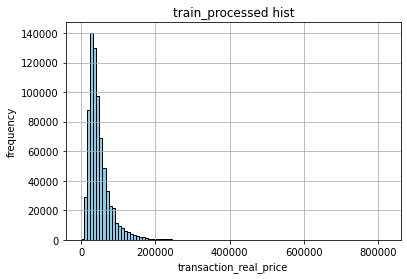

In [72]:
# 시각화
plt.hist(train_processed['transaction_real_price'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('transaction_real_price')
plt.ylabel('frequency')
plt.title('train_processed hist')
plt.grid(True)
plt.show()

#### exclusive_use_area 피쳐 탐색

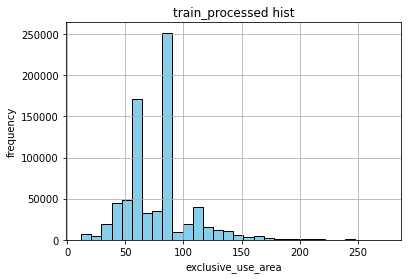

In [73]:
# 시각화
plt.hist(train_processed['exclusive_use_area'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('exclusive_use_area')
plt.ylabel('frequency')
plt.title('train_processed hist')
plt.grid(True)
plt.show()

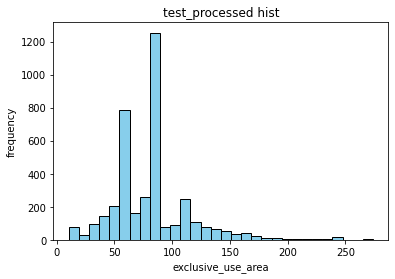

In [74]:
# 시각화
plt.hist(test_processed['exclusive_use_area'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('exclusive_use_area')
plt.ylabel('frequency')
plt.title('test_processed hist')
plt.show()

### year_of_completion

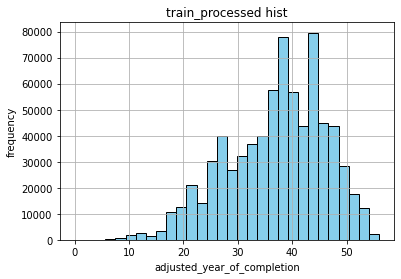

In [75]:
# 시각화
plt.hist(train_processed['adjusted_year_of_completion'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('adjusted_year_of_completion')
plt.ylabel('frequency')
plt.title('train_processed hist')
plt.grid(True)
plt.show()

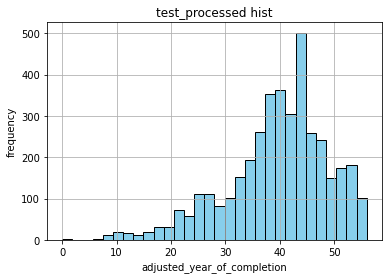

In [76]:
# 시각화
plt.hist(test_processed['adjusted_year_of_completion'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('adjusted_year_of_completion')
plt.ylabel('frequency')
plt.title('test_processed hist')
plt.grid(True)
plt.show()

### floor

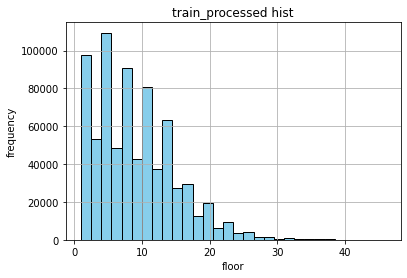

In [77]:
# 시각화
plt.hist(train_processed['floor'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('floor')
plt.ylabel('frequency')
plt.title('train_processed hist')
plt.grid(True)
plt.show()

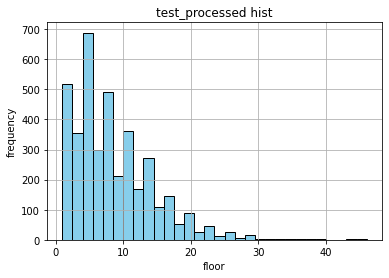

In [78]:
# 시각화
plt.hist(test_processed['floor'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('floor')
plt.ylabel('frequency')
plt.title('test_processed hist')
plt.grid(True)
plt.show()

#### 최단 거리 데이터 분포

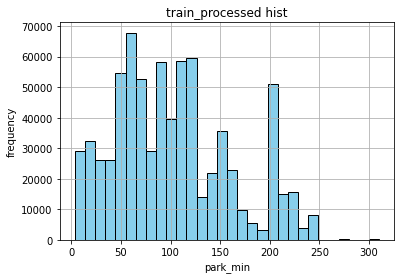

In [79]:
# 시각화 park_min
plt.hist(train_processed['park_min'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('park_min')
plt.ylabel('frequency')
plt.title('train_processed hist')
plt.grid(True)
plt.show()

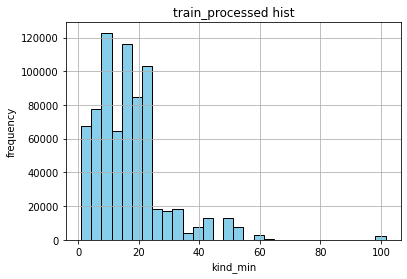

In [80]:
# 시각화 kind_min
plt.hist(train_processed['kind_min'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('kind_min')
plt.ylabel('frequency')
plt.title('train_processed hist')
plt.grid(True)
plt.show()

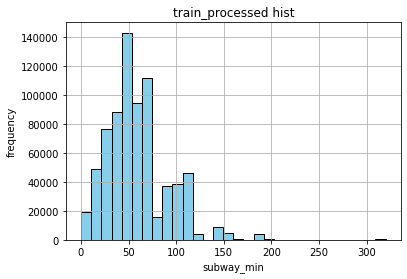

In [81]:
# 시각화 subway_min
plt.hist(train_processed['subway_min'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('subway_min')
plt.ylabel('frequency')
plt.title('train_processed hist')
plt.grid(True)
plt.show()

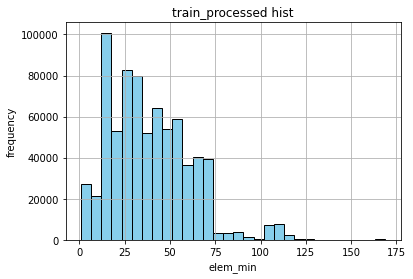

In [82]:
# 시각화 elem_min
plt.hist(train_processed['elem_min'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('elem_min')
plt.ylabel('frequency')
plt.title('train_processed hist')
plt.grid(True)
plt.show()

In [83]:
#train_processed.to_csv('train_processed_final.csv', index=False)
#test_processed.to_csv('test_processed_final.csv', index=False)

# 3. 피쳐 엔지니어링 후 모델링

### 크기 74x,xxx 표본에서 크기 20,000의 subsample로 진행하기
1. 데이터의 크기가 너무 커서 단순 임의 표본추출(simple random sampling)로 2만개의 데이터를 활용하기로 한다.
2. 회귀 진단 부분에서 데이터의 크기가 너무 커서 그림이 그려지지 않으므로 표본의 크기를 불가피하게 줄이게 되었다.
3. 충분한 크기의 random sampling을 거친 subsample은 원래 표본의 분포를 대표한다는 가정 아래 회귀 분석을 진행하도록 한다.

In [84]:
# random sampling으로 원래 표본에서 20,000 데이터를 추출
subsample_train = train_processed.sample(n=20000, random_state=42)
subsample_train.describe()

,transaction_id,apartment_id_x,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,lat,long,park_min,kind_min,subway_min,elem_min,adjusted_year_of_completion
count,2.000000e+04,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.306861e+05,6442.68925,77.953164,1998.023450,201329.762500,8.76420,48949.220600,37.555362,127.002096,103.121771,16.868592,59.160944,38.864339,37.023450
std,3.253950e+05,3524.26495,28.196052,8.978014,290.945684,5.83917,32897.040815,0.057002,0.088647,59.868507,11.916211,31.999428,22.109746,8.978014
min,7.000000e+00,0.00000,12.010000,1966.000000,200801.000000,1.00000,790.000000,37.445050,126.793126,3.610804,1.047359,0.298153,1.014755,5.000000
25%,1.873072e+05,3694.25000,59.760000,1992.000000,201102.000000,4.00000,29200.000000,37.505560,126.929380,56.800661,9.293668,36.862855,22.921917,31.000000
50%,3.728075e+05,6080.00000,83.395000,1999.000000,201406.000000,8.00000,40000.000000,37.543568,127.020195,98.285395,15.083572,53.396158,35.183073,38.000000
75%,5.595892e+05,9549.00000,84.960000,2004.000000,201603.000000,12.00000,58000.000000,37.597420,127.072420,140.212920,21.729541,71.614012,52.715537,43.000000
max,1.196847e+06,12656.00000,267.000000,2017.000000,201711.000000,46.00000,650000.000000,37.682606,127.171300,310.361784,101.521611,319.672054,168.886516,56.000000


In [85]:
train_processed.describe()

,transaction_id,apartment_id_x,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price,lat,long,park_min,kind_min,subway_min,elem_min,adjusted_year_of_completion
count,7.420150e+05,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000,742015.000000
mean,4.262323e+05,6442.010707,77.873557,1998.054167,201327.601516,8.793549,49110.587211,37.555046,127.001507,102.043747,16.884984,58.973273,38.807148,37.054167
std,3.216674e+05,3541.970747,28.631402,8.996365,289.819920,5.860835,33669.739044,0.056750,0.088990,59.667078,11.935954,32.130665,22.287681,8.996365
min,0.000000e+00,0.000000,11.955900,1961.000000,200801.000000,1.000000,350.000000,37.445050,126.793126,3.466185,0.988599,0.298153,1.014755,0.000000
25%,1.855365e+05,3668.000000,59.740000,1992.000000,201102.000000,4.000000,29000.000000,37.505560,126.929161,56.800661,9.020449,36.792115,22.796014,31.000000
50%,3.710930e+05,6149.000000,83.140000,1999.000000,201405.000000,8.000000,40000.000000,37.543636,127.020195,93.745189,15.083572,53.348907,35.183073,38.000000
75%,5.567125e+05,9609.000000,84.960000,2004.000000,201603.000000,12.000000,58000.000000,37.597420,127.072420,139.962285,21.729541,71.614012,52.715537,43.000000
max,1.196849e+06,12658.000000,273.967000,2017.000000,201711.000000,46.000000,820000.000000,37.682606,127.171300,310.361784,101.521611,319.672054,168.886516,56.000000


- 74만개 데이터로 구성된 train_processed 셋과 매우 유사한 통계량을 가진 subsample_train 서브샘플(n=20,000)을 확인할 수 있다.

In [86]:
#pip install pygam dmba --q

Note: you may need to restart the kernel to use updated packages.


In [87]:
#pip install Numpy==1.23.5

In [88]:
#pip install statsmodels --upgrade

In [89]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
    
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import OLSInfluence

from pygam import LinearGAM, s, l
from pygam.datasets import wage

import seaborn as sns
import matplotlib.pyplot as plt

from dmba import stepwise_selection
from dmba import AIC_score

no display found. Using non-interactive Agg backend


### 상관관계 분석

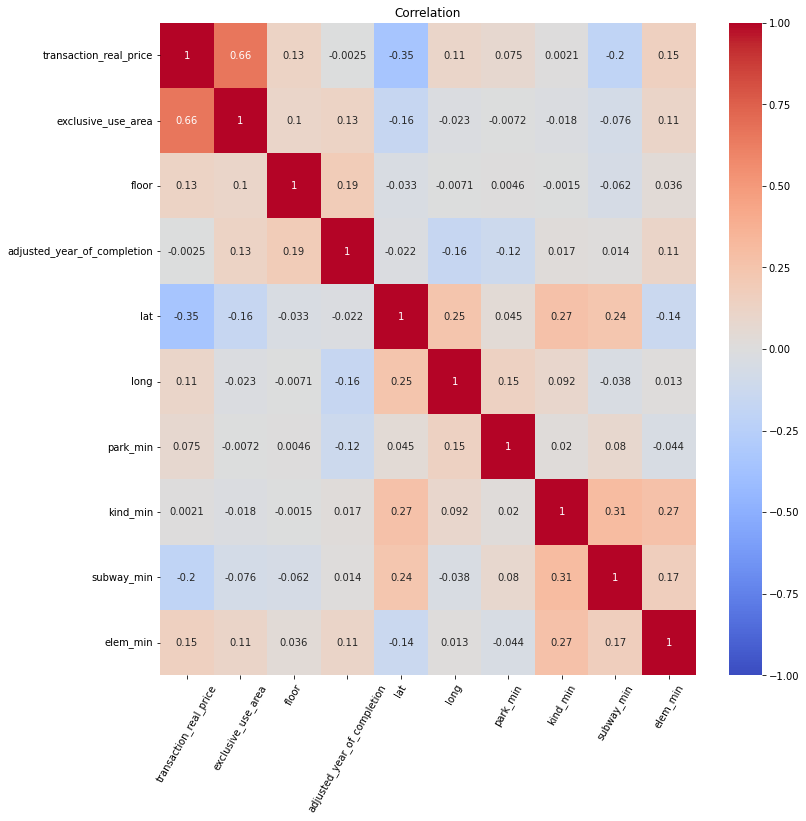

In [117]:
# full model 피쳐
variables = ['transaction_real_price', 'exclusive_use_area', 'floor', 'adjusted_year_of_completion', 'lat', 'long', 'park_min', 'kind_min',
             'subway_min', 'elem_min']

# 상관관계 행렬 계산
corr = subsample_train[variables].corr()

# Heatmap으로 시각화
plt.figure(figsize=(12, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation')
plt.xticks(rotation=60)  # x 축 눈금값을 45도 기울임

plt.show()

### 해석
1. exclusive_use_area(전용면적) 변수가 실거래가에 강한 양의 상관관계(피어슨 계수 0.66)를 가지고 있다. 단순 선형 회귀 모델에서 전용면적 변수는 실거래가의 분산의 약 40%를 설명하는 것을 확인하였다.
2. lat(위도) 변수가 실거래가에 -0.35의 음의 상관관계를 가진다. 위도가 낮아지면, 즉 서울 강남지역일 수록 실거래가격은 평균적으로 높아지는 점을 생각할 수 있다.

### 다중선형회귀

In [91]:
# 1. 예측변수 및 반응변수 설정
predictors = ['exclusive_use_area', 'floor', 'adjusted_year_of_completion', 'lat', 'long', 'park_min', 'kind_min',
             'subway_min', 'elem_min']
outcome = 'transaction_real_price'

# 2. 다중선형회귀 모델링
house_lm = LinearRegression()
house_lm.fit(subsample_train[predictors], subsample_train[outcome])

# 3. 회귀계수 확인
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -1079743.898
Coefficients:
 exclusive_use_area: 712.4468887502029
 floor: 370.8698573493031
 adjusted_year_of_completion: -259.1607626710198
 lat: -166185.5921810192
 long: 57609.82732729608
 park_min: 37.94539625261437
 kind_min: 272.7057350966943
 subway_min: -114.32800577840317
 elem_min: 60.265111303062724


### 표본 내 평가 : RMSE, R-squared

In [92]:
fitted = house_lm.predict(subsample_train[predictors])
RMSE = np.sqrt(mean_squared_error(subsample_train[outcome], fitted))
r2 = r2_score(subsample_train[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 21760
r2: 0.5625


### 회귀 결과 보고서

In [93]:
model = sm.OLS(subsample_train[outcome], subsample_train[predictors].assign(const=1))
results = model.fit()
print(results.summary())

                              OLS Regression Results                              
Dep. Variable:     transaction_real_price   R-squared:                       0.562
Model:                                OLS   Adj. R-squared:                  0.562
Method:                     Least Squares   F-statistic:                     2855.
Date:                    Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                            13:00:38   Log-Likelihood:            -2.2814e+05
No. Observations:                   20000   AIC:                         4.563e+05
Df Residuals:                       19990   BIC:                         4.564e+05
Df Model:                               9                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

### 해석 및 인사이트
1. 모든 변수를 포함한 다중선형 모델(full model)은 수정 R-squared 값이 0.562로, 이는 예측변수들의 조합이 실거래 가격의 분산을 약 56.2% 설명하는 것을 의미한다.
2. 회귀계수들의 p값은 0에 근사하는데, 이는 모든 회귀계수의 추정값이 통계적으로 유의미함을 의미한다.
3. 전용면적(exclusive_use_area)의 경우 회귀계수가 712.45로, 이는 전용면적이 1단위 증가할 때 실거래 가격은 평균적으로 약 712만원 증가함을 의미한다.
4. 층수(floor) 변수의 회귀계수는 370로, 이는 일반적으로 사람들이 저층보다 고층을 선호하는 특성을 반영한다고 해석할 수 있다.
5. 위도(lat)의 회귀계수는 음수값이 나오는데, 이는 강북지역보다 강남지역의 아파트 가격이 평균적으로 높다는 점을 생각할 수 있다.
6. 경도(long)의 회귀계수는 양수값으로, 이는 서울 아파트 가격이 평균적으로 서쪽에서 동쪽으로 이동함에 따라 증가하는 것을 의미한다.
7. 조정된 완공 시기(adjusted_year_of_completion)의 회귀계수는 음수값이 나오는데, 이는 최근에 지어진 아파트보다 이전에 지어진 아파트의 거래가격이 높았음을 의미한다. 이는 서초, 강남, 대치동 등 집값이 높은 지역의 아파트의 경우 건축시기가 오래되었음에도 위치에 따라 가격이 높은 점을 생각할 수 있다.
8. 피쳐 엔지니어링을 통해 추가한 변수들 중 유일하게 지하철 최단거리(subway_min) 변수의 회귀계수가 음수로 나왔다. 이는 지하철과의 거리가 가까울 수록 거래가격이 평균적으로 높아지는 것으로 충분히 해석할 수 있다.
9. 공원(park_min), 유치원(kind_min), 초등학교(elem_min) 최단거리 변수의 경우 회귀계수가 양수 값이 나왔는데, 생각했던 것과 반대되는 결과로 변수에 대한 세부적인 조사와 분석이 필요하다고 생각한다. 서울특별시의 특성을 고려하여 무언가 누락된 교란변수가 있을 것이라고 생각한다.

### 변수간 상호작용을 고려한 모델 확인
- 공원(park_min), 유치원(kind_min), 초등학교(elem_min) 최단거리 변수와 지하철 최단거리(subway_min) 변수의 상호작용을 고려한 모델링

In [94]:
model_inter = smf.ols(formula='transaction_real_price ~  exclusive_use_area + floor + adjusted_year_of_completion + ' +
                      'lat + long + park_min + park_min*subway_min + kind_min + kind_min*subway_min + ' +
                      'subway_min + elem_min + elem_min*subway_min', data=subsample_train)
results_inter = model_inter.fit()
print(results_inter.summary())

                              OLS Regression Results                              
Dep. Variable:     transaction_real_price   R-squared:                       0.565
Model:                                OLS   Adj. R-squared:                  0.565
Method:                     Least Squares   F-statistic:                     2165.
Date:                    Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                            13:00:39   Log-Likelihood:            -2.2807e+05
No. Observations:                   20000   AIC:                         4.562e+05
Df Residuals:                       19987   BIC:                         4.563e+05
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

- 상호작용 항을 고려한 결과 초등학교와의 최단거리(elem_min) 변수의 회귀계수가 음수로 바뀐 것을 확인하였다.

# 4. 변수 선택 (Stepwise Regression)

In [95]:
predictors = ['exclusive_use_area', 'floor', 'adjusted_year_of_completion', 'lat', 'long', 'park_min', 'kind_min',
             'subway_min', 'elem_min']

X = subsample_train[predictors]

house_full = sm.OLS(subsample_train[outcome], X.assign(const=1))
results = house_full.fit()

In [96]:
y = subsample_train[outcome]

# 1. 모델링 함수
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

# 2. 변수 추가에 따른 AIC 지표 확인 함수
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()] * len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model,
                                                verbose=True)

# 3. 결과 출력
print()
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: exclusive_use_area, floor, adjusted_year_of_completion, lat, long, park_min, kind_min, subway_min, elem_min
Start: score=472806.06, constant
Step: score=461328.99, add exclusive_use_area
Step: score=459011.47, add lat
Step: score=457564.13, add long
Step: score=457300.36, add kind_min
Step: score=456901.87, add subway_min
Step: score=456664.24, add park_min
Step: score=456536.86, add floor
Step: score=456352.90, add adjusted_year_of_completion
Step: score=456292.10, add elem_min
Step: score=456292.10, unchanged None

Intercept: -1079743.898
Coefficients:
 exclusive_use_area: 712.4468887502036
 lat: -166185.59218102333
 long: 57609.82732729633
 kind_min: 272.7057350967207
 subway_min: -114.32800577838498
 park_min: 37.945396252616774
 floor: 370.8698573492766
 adjusted_year_of_completion: -259.16076267103927
 elem_min: 60.2651113030297


### 해석 및 인사이트
1. 전진 선택법을 통해 AIC (Akaike's information criterion) 지표를 가장 많이 최소화 하는 변수들을 순차적으로 모델에 포함시킨다.
2. 전용면적(exclusive_use_area), 위도(lat), 경도(long) 등 순으로 모델에 가장 유의미한 변수가 추가되었고, 초등학교 최단거리(elem_min) 변수는 AIC 지표를 최소화하는데 가장 영향력이 작았던 것으로 생각할 수 있다.
3. 일반적으로 신도시의 경우 초등학교가 가까이 있는 아파트의 가격이 높기 때문에 초등학교와의 거리가 아파트 가격에 중요한 역할을 할 것이라는 판단이 서울특별시 거래 데이터에 대한 회귀 모델에서는 반대되는 결과가 나온 점에 대해 생각해볼 필요가 있었다.
4. 서울의 경우 여의도, 용산, 강남, 서초 등 기업 공공기관이 밀집된 곳의 아파트 가격이 높은데, 기업 및 주요 기관 밀집지역과의 위치 같은 변수들이 누락된 교란변수 중 하나로 작용했을 것이라 생각한다. 추가적인 조사를 통한 변수 추가의 필요성을 확인하였다.

# 5. 회귀 진단

### 1) 표준화 잔차, hat value, 쿡의 거리를 통해 본 Outlier

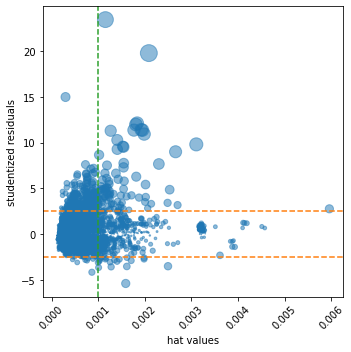

In [97]:
# 1. OLSInfluence 함수를 통해 표준화잔차, 햇값, 쿡의 거리를 가져올 수 있다.
influence = OLSInfluence(results)
fig, ax = plt.subplots(figsize=(5, 5))
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.axvline(0.001, linestyle='--', color='C2')

# 2. 표준화잔차는 y축, 햇값은 x축을 기준으로 산점도를 그린다. 쿡의 거리는 원의 크기로 표현한다.
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal,
           s=1000 * np.sqrt(influence.cooks_distance[0]),
           alpha=0.5)

ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

plt.xticks(rotation=45)  # x 축 눈금값을 45도 기울임

plt.tight_layout()
plt.show()

In [98]:
# 모델의 표준화 잔차 통계량
influence.resid_studentized_internal.describe()

count    20000.000000
mean         0.000023
std          1.000169
min         -5.411359
25%         -0.561110
50%         -0.109458
75%          0.390073
max         23.437896
dtype: float64

In [99]:
# 1. 쿡의 거리가 0.08을 초과하는 데이터를 제외
mask = [dist < .08 for dist in influence.cooks_distance[0]]
house_infl = subsample_train.loc[mask]

# 2. 영향값을 제외한 데이터로 모델링
ols_infl = sm.OLS(house_infl[outcome], house_infl[predictors].assign(const=1))
result_infl = ols_infl.fit()

pd.DataFrame({
    'Original': results.params,
    'Influential removed': result_infl.params,
})

,Original,Influential removed
exclusive_use_area,7.124469e+02,7.079722e+02
floor,3.708699e+02,3.782998e+02
adjusted_year_of_completion,-2.591608e+02,-2.619992e+02
lat,-1.661856e+05,-1.662476e+05
long,5.760983e+04,5.759808e+04
park_min,3.794540e+01,3.768720e+01
kind_min,2.727057e+02,2.695303e+02
subway_min,-1.143280e+02,-1.139854e+02
elem_min,6.026511e+01,6.042807e+01
const,-1.079744e+06,-1.075502e+06


### 해석 및 인사이트
1. 표준화잔차 기준 (y축 주황선, |2.5| )과 hat values 기준( 2*(9 + 1)/ 742015 = 0.001, x축 초록선 )을 벗어나는 데이터를 이상치로 생각할 수도 있다.
2. 한편 쿡의 거리가 0.08을 초과하는 데이터는 거의 없는 것으로 확인하였다.
3. 쿡의 거리는 데이터가 회귀직선에 끼치는 영향을 측정하는데 그래프와 영향값을 제거한 모델의 결과를 보면, 다중회귀 모델의 잔차는 크지만 회귀직선의 기울기에 대한 이상치의 영향력은 작다는 것을 파악할 수 있다.

### 2) 이분산성 확인을 위한 예측값 - 잔차(절댓값) 플롯

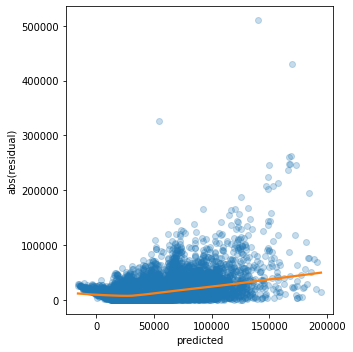

In [118]:
# 예측값 - 잔차(절댓값) 플롯
fig, ax = plt.subplots(figsize=(5, 5))
sns.regplot(x=results.fittedvalues, y=np.abs(results.resid),
            scatter_kws={'alpha': 0.25},
            line_kws={'color': 'C1'},
            lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

plt.tight_layout()
plt.show()

### 해석
1. 주황색 선은 구간에 따라 회귀직선을 그려 스무스하게 연결한 '산점도 평활기'로, 산점도의 평균적인 추세를 나타낸다.
2. 예측값이 약 35,000인 부분 전후로 예측값의 변화에 따라 잔차의 분산이 커지는 것을 확인할 수 있다.
3. 이는 선형모델의 예측값의 범위에 따라 실제값을 설명하는 불확실성이 커지는 것을 의미한다.
4. 이러한 예측값 - 잔차 플롯을 바탕으로 비선형 모델링의 필요성을 설명할 수 있다.

### 3) 잔차의 정규성 확인을 위한 표준화잔차 히스토그램

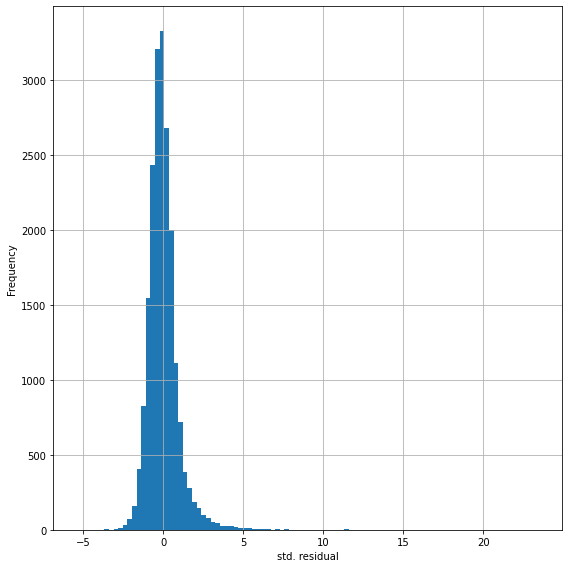

In [119]:
# 표준화 잔차 히스토그램
fig, ax = plt.subplots(figsize=(8, 8))
pd.Series(influence.resid_studentized_internal).hist(ax=ax, bins=100)
ax.set_xlabel('std. residual')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 해석
1. 표준화잔차의 분포가 전체적으로 비교적 정규분포를 따르는 것처럼 보이지만, 표준화잔차 +2.5 방향으로 영향값이 몰려있는 점을 확인할 수 있다(right-skewed).
2. 이를 통해 모델이 실제값을 과대추정한 데이터보다 과소추정한 데이터가 많을 것이라고 추정할 수 있다.

### 4) 반응변수와 예측변수 간 관계를 확인하기 위한 편잔차 플롯
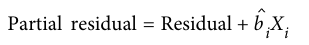

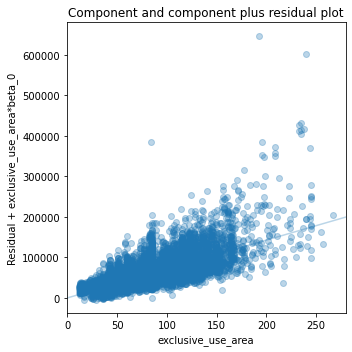

In [140]:
# 전용면적(exclusive_use_area) 변수와 편잔차 플롯
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(results, 'exclusive_use_area', ax=ax)

# 산점도의 투명도 설정
for line in ax.get_lines():
    line.set_alpha(0.3)

plt.tight_layout()
plt.show()

### 해석
1. 전용면적(exclusive_use_area)이 커지면서 잔차의 분산이 커지는 것을 확인할 수 있다.
2. 이는 전용면적이 증가함에 따라 실거래 가격 예측에 대한 불확실성이 증가하는 것을 의미한다.
3. 따라서 전용면적 변수를 2차 항으로 모델링하는 다항회귀로 해당 변수에 대한 비선형 모델링의 근거로 활용할 수 있다.

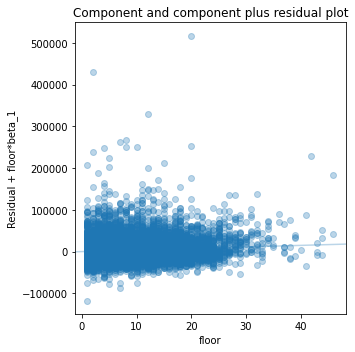

In [141]:
# floor 변수와 편잔차 플롯
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(results, 'floor', ax=ax)

# 산점도의 투명도 설정
for line in ax.get_lines():
    line.set_alpha(0.3)

plt.tight_layout()
plt.show()

### 해석
1. floor 변수가 증가함에 따라 편잔차의 분산이 전체적으로 줄어드는 것으로 보인다.
2. 이는 층수가 낮을 때 실거래가격에 대한 불확실성이 높은 경우보다 크다는 것을 의미한다.
3. 산점도가 전체적으로 직선을 중심으로 분포해 있으므로 floor 변수에 대하여는 비선형 모델링을 고려하지 않기로 한다.

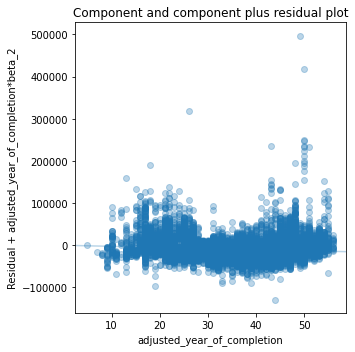

In [142]:
# adjusted_year_of_completion 변수와 편잔차 플롯
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(results, 'adjusted_year_of_completion', ax=ax)

# 산점도의 투명도 설정
for line in ax.get_lines():
    line.set_alpha(0.3)

plt.tight_layout()
plt.show()

### 해석
1. adjusted_year_of_completion 변수의 편잔차 그림을 보면 대략 30을 전후로 잔차의 분산이 커지는 것을 확인할 수 있다.
2. 이 경우 2차 함수의 곡선으로 모델을 데이터에 더 fitting 할 수 있으므로, adjusted_year_of_completion 변수를 비선형 모델링에 포함시킨다.

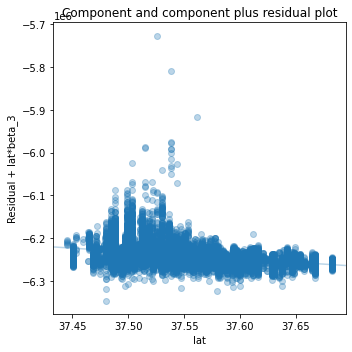

In [143]:
# lat 변수와 편잔차 플롯
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(results, 'lat', ax=ax)

# 산점도의 투명도 설정
for line in ax.get_lines():
    line.set_alpha(0.3)

plt.tight_layout()
plt.show()

### 해석
1. lat 변수의 편잔차 그림을 보면 37.55 밑으로 잔차의 분산이 크고, 위로는 비교적 잔차의 분산이 일정함을 확인할 수 있다.
2. 이 경우 2차 함수의 곡선으로 모델을 데이터에 더 fitting 할 수 있으므로, lat 변수를 비선형 모델링에 포함시킨다.

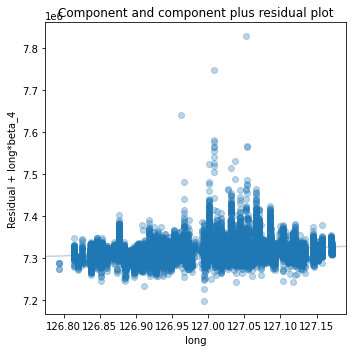

In [144]:
# long 변수와 편잔차 플롯
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(results, 'long', ax=ax)

# 산점도의 투명도 설정
for line in ax.get_lines():
    line.set_alpha(0.3)

plt.tight_layout()
plt.show()

### 해석
1. long 변수의 편잔차 그림을 보면 가운데에서 오른쪽 부분에서 잔차의 분산이 커진다.
2. 위 산점도의 경우는 평균적으로 직선 모델링을 유지하는 것이 나을 것으로 생각된다.

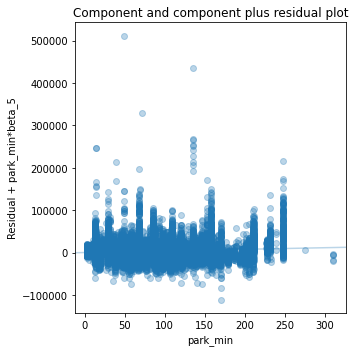

In [145]:
# park_min 변수와 편잔차 플롯
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(results, 'park_min', ax=ax)

# 산점도의 투명도 설정
for line in ax.get_lines():
    line.set_alpha(0.3)

plt.tight_layout()
plt.show()

### 해석
1. park_min 변수의 편잔차 그림은 200 ~ 250 부분에서 직선이 좀 더 올라가면 모델이 조금 더 fit할 것으로 보인다.
2. 따라서 park_min 변수를 비선형 모델링에 포함시킨다.

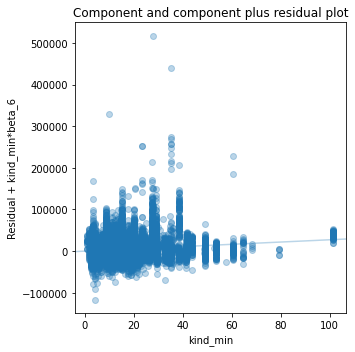

In [146]:
# kind_min 변수와 편잔차 플롯
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(results, 'kind_min', ax=ax)

# 산점도의 투명도 설정
for line in ax.get_lines():
    line.set_alpha(0.3)

plt.tight_layout()
plt.show()

### 해석
1. kind_min 변수의 편잔차 그림 또한 살짝 곡선으로 모델링하면 fit할 것으로 보인다.
2. 따라서 kind_min 변수를 비선형 모델링에 포함시킨다.

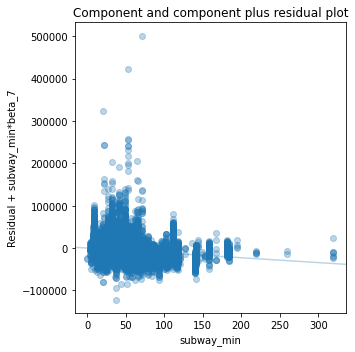

In [147]:
# subway_min 변수와 편잔차 플롯
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(results, 'subway_min', ax=ax)

# 산점도의 투명도 설정
for line in ax.get_lines():
    line.set_alpha(0.3)

plt.tight_layout()
plt.show()

### 해석
1. subway_min 변수의 편잔차 그림 또한 살짝 곡선으로 모델링하면 fit할 것으로 보인다.
2. 따라서 subway_min 변수를 비선형 모델링에 포함시킨다.

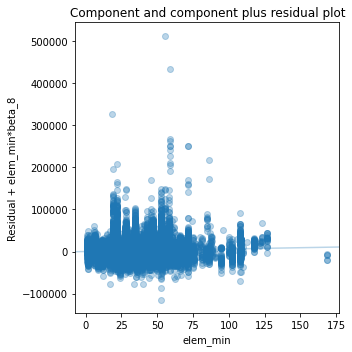

In [148]:
# elem_min 변수와 편잔차 플롯
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(results, 'elem_min', ax=ax)

# 산점도의 투명도 설정
for line in ax.get_lines():
    line.set_alpha(0.3)

plt.tight_layout()
plt.show()

### 해석
1. 마지막으로 elem_min 변수는 비선형 모델링을 할만한 두드러진 특징은 없는 것 같다.
2. 25, 50 부분에서 잔차의 분산이 커지는 결과를 확인할 수 있다.

# 5. 비선형 모델링
- 앞선 편잔차 그림을 통해 비선형 모델링에 포함시킨 예측변수는 아래와 같다.
- exclusive_use_area, adjusted_year_of_completion, lat, park_min, kind_min, subway_min

## 5-1. 다항회귀

In [129]:
# 다항회귀 모델링. np.power() 부분이 2차항
model_poly = smf.ols(formula='transaction_real_price ~  exclusive_use_area + np.power(exclusive_use_area, 2) + ' +
                'floor + adjusted_year_of_completion + np.power(adjusted_year_of_completion, 2) + ' +
                'lat + np.power(lat, 2) + long + park_min + np.power(park_min, 2) + ' +
                'kind_min + np.power(kind_min, 2) + subway_min + np.power(subway_min, 2) + elem_min', 
                data=subsample_train)
result_poly = model_poly.fit()
print(result_poly.summary())

                              OLS Regression Results                              
Dep. Variable:     transaction_real_price   R-squared:                       0.635
Model:                                OLS   Adj. R-squared:                  0.635
Method:                     Least Squares   F-statistic:                     2321.
Date:                    Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                            13:23:33   Log-Likelihood:            -2.2631e+05
No. Observations:                   20000   AIC:                         4.527e+05
Df Residuals:                       19984   BIC:                         4.528e+05
Df Model:                              15                                         
Covariance Type:                nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

### 해석
1. 해당 예측변수에 다항 회귀를 적용한 결과 조정된 R-squared 값이 기존 선형모델의 0.562에서 0.635로 상승하였다.
2. kind_min 변수의 2차항 회귀계수의 p값이 유의수준보다 높게 나왔는데, 이는 해당 회귀계수가 통계적으로 유의미하지 않다는 것을 의미한다. 따라서 이를 근거로 kind_min의 2차항을 삭제할 수 있다.

In [130]:
model_poly = smf.ols(formula='transaction_real_price ~  exclusive_use_area + np.power(exclusive_use_area, 2) + ' +
                'floor + adjusted_year_of_completion + np.power(adjusted_year_of_completion, 2) + ' +
                'lat + np.power(lat, 2) + long + park_min + np.power(park_min, 2) + ' +
                'kind_min + subway_min + np.power(subway_min, 2) + elem_min', 
                data=subsample_train)
result_poly = model_poly.fit()
print(result_poly.summary())

                              OLS Regression Results                              
Dep. Variable:     transaction_real_price   R-squared:                       0.635
Model:                                OLS   Adj. R-squared:                  0.635
Method:                     Least Squares   F-statistic:                     2487.
Date:                    Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                            13:23:33   Log-Likelihood:            -2.2631e+05
No. Observations:                   20000   AIC:                         4.527e+05
Df Residuals:                       19985   BIC:                         4.528e+05
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

### 비선형 모델링 후 편잔차 그림 확인

2.5177263530654947


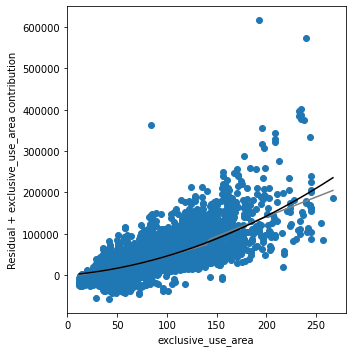

In [131]:
# 산점도 평활기와 독립변수의 다항회귀 곡선을 시각화 하는 함수
def partialResidualPlot(model, df, outcome, feature, ax):
    y_pred = model.predict(df)
    copy_df = df.copy()
    for c in copy_df.columns:
        if c == feature:
            continue
        copy_df[c] = 0.0
    feature_prediction = model.predict(copy_df)
    results = pd.DataFrame({
        'feature': df[feature],
        'residual': df[outcome] - y_pred,
        'ypartial': feature_prediction - model.params[0],
    })
    results = results.sort_values(by=['feature'])
    smoothed = sm.nonparametric.lowess(results.ypartial, results.feature, frac=1/3)

    ax.scatter(results.feature, results.ypartial + results.residual)
    ax.plot(smoothed[:, 0], smoothed[:, 1], color='gray')
    ax.plot(results.feature, results.ypartial, color='black')
    ax.set_xlabel(feature)
    ax.set_ylabel(f'Residual + {feature} contribution')
    return ax

fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_poly, subsample_train, 'transaction_real_price', 'exclusive_use_area', ax)

plt.tight_layout()
plt.show()
print(result_poly.params[2]) # 2차항의 회귀계수

### 해석
1. 짙은 검은 색 곡선이 다항회귀를 적용한 곡선, 옅은 회색은 산점도 평활기이다.
2. 곡선 그래프가 데이터의 분포에 좀 더 fit한 것으로 보인다.

67.70126956325839


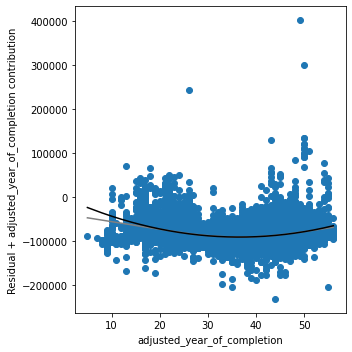

In [132]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_poly, subsample_train, 'transaction_real_price', 'adjusted_year_of_completion', ax)

plt.tight_layout()
plt.show()
print(result_poly.params[5])

-517512.4276188055


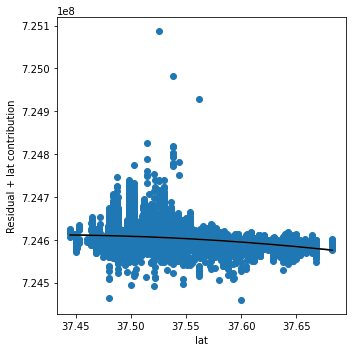

In [133]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_poly, subsample_train, 'transaction_real_price', 'lat', ax)

plt.tight_layout()
plt.show()
print(result_poly.params[7])

0.9855568260649384


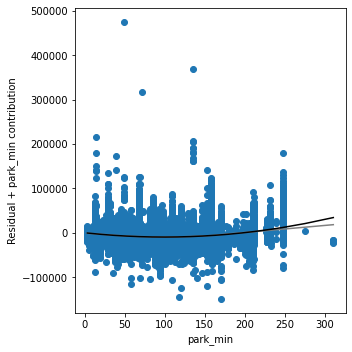

In [134]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_poly, subsample_train, 'transaction_real_price', 'park_min', ax)

plt.tight_layout()
plt.show()
print(result_poly.params[10])

0.7581282830246305


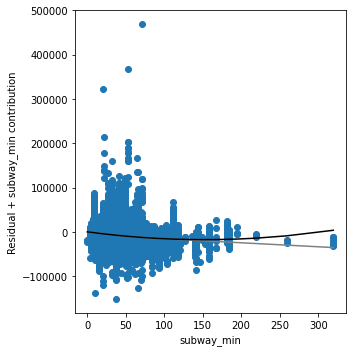

In [135]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_poly, subsample_train, 'transaction_real_price', 'subway_min', ax)

plt.tight_layout()
plt.show()
print(result_poly.params[13])

### 해석
1. 일부 곡선은 생각했던 것처럼 결과가 나온 것 같지 않다.
2. 2차항의 회귀계수는 직접적인 의미를 해석하기 어렵고, 모델이 데이터에 얼마만큼 적합한지 시각적으로 확인할 수 있다.

## 5-2. 스플라인 회귀

In [136]:
formula = ('transaction_real_price ~ bs(exclusive_use_area, df=6, degree=3) + ' +
           'bs(floor, df=6, degree=3) + bs(adjusted_year_of_completion, df=6, degree=3) + ' +
           'bs(lat, df=6, degree=3) + bs(long, df=6, degree=3) + ' +
           'bs(park_min, df=6, degree=3) + bs(kind_min, df=6, degree=3) + ' +
           'bs(subway_min, df=6, degree=3) + bs(elem_min, df=6, degree=3)'
          )
model_spline = smf.ols(formula=formula, data=subsample_train)
result_spline = model_spline.fit()
print(result_spline.summary())

                              OLS Regression Results                              
Dep. Variable:     transaction_real_price   R-squared:                       0.706
Model:                                OLS   Adj. R-squared:                  0.705
Method:                     Least Squares   F-statistic:                     885.6
Date:                    Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                            13:23:38   Log-Likelihood:            -2.2417e+05
No. Observations:                   20000   AIC:                         4.485e+05
Df Residuals:                       19945   BIC:                         4.489e+05
Df Model:                              54                                         
Covariance Type:                nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

### 해석
1. degree=3 설정으로 3차 스플라인 회귀를 적용한 결과, 조정된 R-squared 값이 이전 다항회귀의 0.635에서 0.705로 향상되었다.
2. 다항회귀에서와 마찬가지로 고차항의 회귀계수는 변수에 대한 직접적인 의미 해석이 어려워진다.

#### 스플라인 회귀 모델의 편잔차 시각화를 위한 모델링

In [169]:
formula_visdual = ('transaction_real_price ~ bs(adjusted_year_of_completion, df=6, degree=3) + ' +
           'floor + exclusive_use_area + lat + long + park_min + kind_min + subway_min + elem_min')

model_spline_visdual = smf.ols(formula=formula_visdual, data=subsample_train)
result_spline_visdual = model_spline_visdual.fit()
print(result_spline_visdual.summary())

                              OLS Regression Results                              
Dep. Variable:     transaction_real_price   R-squared:                       0.619
Model:                                OLS   Adj. R-squared:                  0.619
Method:                     Least Squares   F-statistic:                     2322.
Date:                    Sun, 25 Feb 2024   Prob (F-statistic):               0.00
Time:                            14:20:42   Log-Likelihood:            -2.2674e+05
No. Observations:                   20000   AIC:                         4.535e+05
Df Residuals:                       19985   BIC:                         4.536e+05
Df Model:                              14                                         
Covariance Type:                nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

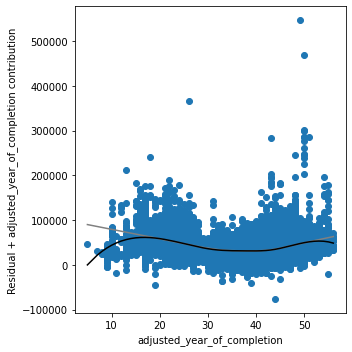

In [170]:
fig, ax = plt.subplots(figsize=(5, 5))
partialResidualPlot(result_spline_visdual, subsample_train, 'transaction_real_price', 'adjusted_year_of_completion', ax)

plt.tight_layout()
plt.show()

# 6. 모델별 표본 내 평가 비교

In [137]:
fitted_lm = house_lm.predict(subsample_train[predictors])
RMSE_lm = np.sqrt(mean_squared_error(subsample_train[outcome], fitted_lm))
r2_lm = r2_score(subsample_train[outcome], fitted_lm)
print(f'RMSE of the Multiple Linear Model: {RMSE_lm:.0f}')
print(f'r2 of the Multiple Linear Model: {r2_lm:.4f}')

RMSE of the Multiple Linear Model: 21760
r2 of the Multiple Linear Model: 0.5625


In [138]:
fitted_poly = result_poly.predict(subsample_train[predictors])
RMSE_poly = np.sqrt(mean_squared_error(subsample_train[outcome], fitted_poly))
r2_poly = r2_score(subsample_train[outcome], fitted_poly)
print(f'RMSE of the Polynomial Model: {RMSE_poly:.0f}')
print(f'r2 of the Polynomial Model: {r2_poly:.4f}')

RMSE of the Polynomial Model: 19864
r2 of the Polynomial Model: 0.6354


In [139]:
fitted_spline = result_spline.predict(subsample_train[predictors])
RMSE_spline = np.sqrt(mean_squared_error(subsample_train[outcome], fitted_spline))
r2_spline = r2_score(subsample_train[outcome], fitted_spline)
print(f'RMSE of the Spline Model: {RMSE_spline:.0f}')
print(f'r2 of the Spline Model: {r2_spline:.4f}')

RMSE of the Spline Model: 17847
r2 of the Spline Model: 0.7057


### 결론
1. 비선형 모델로 데이터에 fitting 할수록 RMSE, R-squared 지표의 향상이 있었다.
2. 선형 모델을 통해서 독립변수와 종속변수의 관계를 회귀계수와 p값을 통해 설명할 수 있었다.
3. 비선형 모델은 선형 모델보다 데이터에 fit한 결과를 얻었지만, 변수 간 관계에 대한 설명력은 포기해야 했다.
4. 비선형 모델링의 경우 일반화가법모형(GAM)을 통해 스플라인의 최적의 매듭점을 자동으로 fitting 할 수 있다.

### 회고
- 아쉬운 점
1. 서울특별시 아파트 가격을 예측하는데 기업 및 주요기관 관련 위치에 관한 데이터가 교란변수로 작용한 것 같다. 추후 관련된 데이터를 확보하면 더 좋은 모델을 만들 수 있을 것이라고 생각한다.
2. 지오코딩 라이브러리 Geopy, 구글 확장 프로그램 등 사용하는 수단에 따라 위도, 경도에 작은 차이가 있는 것을 발견했다.
3. 피쳐 엔지니어링을 하여 추가한 공원, 학교, 지하철, 보육시설에 대한 최단거리 정보를 거리에 따른 순서형 변수로 변환하거나 일정 거리에 포함되는 개수를 세는 등 다양한 방법들을 활용하지 못한 것 같다.
4. 더 다양한 변수를 추가하기 위한 부동산 관련 전문지식이 부족함을 느꼈다.
5. 일반화가법모형(GAM)을 코드로 구현하는데 어려움이 있어 활용하지 못했다.

- 잘한 점
1. 주소 데이터를 위도, 경도로 반환하는 지오코딩을 직접 수행하였고, 위도, 경도에 따른 거리를 계산하는 하버사인 방법을 찾는 등, 짧은 시간에 문제해결을 완수하였다.
2. 단순한 회귀분석 해석에 그치지 않고, 회귀진단과 진차분석을 수행하여 모델을 설명하는 시도를 하였다.
3. 2번의 결과에 따라 다항회귀, 스플라인 회귀를 적용하여, 비선형 모델링을 통해 RMSE, R2 지표를 향상시키는 모델 개선을 이루었다.